In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import requests
from statistics import mean

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)

# >>> from pandas_datareader import data as pdr
# >>> import yfinance as yf
# >>> yf.pdr_override()
# >>> y_symbols = ['SCHAND.NS', 'TATAPOWER.NS', 'ITC.NS']
# >>> from datetime import datetime
# >>> startdate = datetime(2022,12,1)
# >>> enddate = datetime(2022,12,15)
# >>> data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)


from pandas_datareader import data as pdr

## 1. https://pypi.org/project/fix-yahoo-finance/0.1.30/
## 2. https://www.gitmemory.com/issue/ranaroussi/yfinance/85/519495150
import yfinance as yf

## Fixes pandas datareader for Yahoo 
yf.pdr_override()

#### Set start and end dates 
##
# ## test_size = 0.3
# dt_start = datetime.datetime(2016, 9, 5)
# dt_end = datetime.datetime(2021, 5, 20) 
#
# ## test_size = 0.3
# dt_start = datetime.datetime(2020, 5, 13) 
# dt_end = datetime.datetime(2021, 5, 20) 
#
# ## test_size = 0.3
# dt_start = datetime.datetime(2020, 5, 1) 
# dt_end = datetime.datetime(2021, 5, 31) 
#
## test_size = 0.3
# start_dt = dt.datetime(2020, 5, 3) 
# end_dt = dt.datetime(2021, 6, 1) 
#
# ## the last 60 days...
# start_dt = dt.datetime(2023, 5, 16) 
# end_dt = dt.datetime(2023, 7, 10) 
# 
# ## within the last 2 years (370 days)
start_dt = dt.datetime(2021, 7, 15) 
end_dt = dt.datetime(2023, 7, 10) 
#
# ## the last 7 months...
# start_dt = dt.datetime(2023, 1, 15) 
# end_dt = dt.datetime(2023, 7, 10) 

# >>> y_symbols = ['SCHAND.NS', 'TATAPOWER.NS', 'ITC.NS']
# >>> from datetime import datetime
# >>> startdate = datetime(2022,12,1)
# >>> enddate = datetime(2022,12,15)
# >>> data = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

symbol = ['AAPL','TSLA','BTC-USD']
# print("Error from below line...")
daily_df_original = pdr.get_data_yahoo([symbol[0]], start=start_dt, end=end_dt)
## daily_df_original = pdr.get_data_yahoo([symbol], start="2017-01-01", end="2017-04-30")

stock_close = daily_df_original['Adj Close']
stock_close.columns = {'Close Price'}

daily_df_original.head(10) #daily_df_original


## Data (row/column) extraction from dataframe...by location, index, or condition
## https://towardsdatascience.com/extract-rows-columns-from-a-dataframe-in-python-r-678e5b6743d6

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-15,149.240005,150.000000,147.089996,148.479996,146.760178,106820300
2021-07-16,148.460007,149.759995,145.880005,146.389999,144.694382,93251400
2021-07-19,143.750000,144.070007,141.669998,142.449997,140.800034,121434600
2021-07-20,143.460007,147.100006,142.960007,146.149994,144.457153,96350000
2021-07-21,145.529999,146.130005,144.630005,145.399994,143.715851,74993500
2021-07-22,145.940002,148.199997,145.809998,146.800003,145.099640,77338200
2021-07-23,147.550003,148.720001,146.919998,148.559998,146.839249,71447400
2021-07-26,148.270004,149.830002,147.699997,148.990005,147.264282,72434100
2021-07-27,149.119995,149.210007,145.550003,146.770004,145.069992,104818600


In [2]:
## Intervals for the Date index
default_intervals = ['1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo']
###### Create macro_intervals_2 based off default_intervals
## for i in range(len(default_intervals)-7):
#### print(default_intervals[-i-1])

## Only valid if the timeframe is within the last 60 days...
micro_intervals = ['1m', '2m', '5m', '15m', '30m', '60m', '90m']

## Does not contain micro intervals, besides '60min'
macro_intervals_1 = ['60m', '1d', '5d', '1wk', '1mo', '3mo']

## Does not contain micro intervals
macro_intervals_2 = ['1d', '5d', '1wk', '1mo', '3mo']

for i in range(len(macro_intervals_1)):
    ## Reverse starting from the end
    interval_frame = macro_intervals_1[-i-1]
    print("Time Interval Frame: "+interval_frame)
    
    x_df_original = pdr.get_data_yahoo(symbol[0], start = start_dt, end = end_dt ,interval=interval_frame)
    x_df_original

# weekly_df_original = pdr.get_data_yahoo(symbol[0], start = dt_start, dt_end = end ,interval='1h')
# weekly_df_original

Time Interval Frame: 3mo
[*********************100%***********************]  1 of 1 completed
Time Interval Frame: 1mo
[*********************100%***********************]  1 of 1 completed
Time Interval Frame: 1wk
[*********************100%***********************]  1 of 1 completed
Time Interval Frame: 5d
[*********************100%***********************]  1 of 1 completed
Time Interval Frame: 1d
[*********************100%***********************]  1 of 1 completed
Time Interval Frame: 60m
[*********************100%***********************]  1 of 1 completed


In [3]:
monthly_df_original = pdr.get_data_yahoo(symbol[0], start = start_dt, end = end_dt ,interval='1mo')
# M_close = monthly_df_original['Adj Close']
# M_close.columns = {'Close Price'}

monthly_df_original

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-01,146.360001,153.490005,144.500000,151.830002,150.071365,1461542800
2021-09-01,152.830002,157.259995,141.270004,141.500000,140.070557,1797835100
2021-10-01,141.899994,153.169998,138.270004,149.800003,148.286728,1565079200
2021-11-01,148.990005,165.699997,147.479996,165.300003,163.630142,1691029000
2021-12-01,167.479996,182.130005,157.800003,177.570007,176.032745,2444766700
2022-01-01,177.830002,182.940002,154.699997,174.779999,173.266891,2108446000
2022-02-01,174.009995,176.649994,152.000000,165.119995,163.690521,1627516300
2022-03-01,164.699997,179.610001,150.100006,174.610001,173.318893,2180800100
2022-04-01,174.029999,178.490005,155.380005,157.649994,156.484299,1687795600


In [4]:
monthly_df_original.tail(5) #aapl_df_monthly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-01,146.830002,165.000000,143.899994,164.899994,164.672226,1520266600
2023-04-01,164.270004,169.850006,159.779999,169.679993,169.445618,969709700
2023-05-01,169.279999,179.350006,164.309998,177.250000,177.005173,1275155500
2023-06-01,177.699997,194.479996,176.929993,193.970001,193.970001,1297101100
2023-07-01,193.779999,193.880005,187.039993,188.610001,188.610001,229348300


In [5]:
#### Original data gets manipulated the same was as the copied data here...
# stock_df = daily_df_original
##
# stock_df.drop('Adj Close', inplace=True, axis=1, level=0)
# stock_df.drop('Close', inplace=True, axis=1, level=0)
# stock_df.drop('High', inplace=True, axis=1, level=0)
# stock_df.drop('Low', inplace=True, axis=1, level=0)
# stock_df.drop('Open', inplace=True, axis=1, level=0)
##
# del stock_df['Adj Close']
# del stock_df['Close']
# del stock_df['High']
# del stock_df['Low']
# del stock_df['Open']

## Explicit copied framework of the orignal dataframe, so to only include the same index dates
stock_df = pd.DataFrame(data=None, columns=None, index=daily_df_original.index)


stock_df.tail(5) 

""
Date
2023-06-30
2023-07-03
2023-07-05
2023-07-06
2023-07-07


<AxesSubplot:title={'center':'Adjusted Closing Price'}, xlabel='Date'>

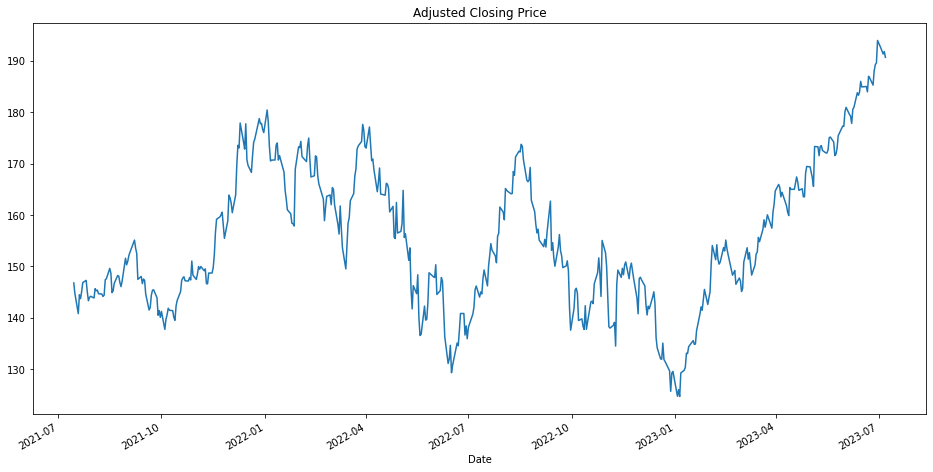

In [6]:
daily_df_original['Adj Close'].plot(label='Apple',figsize = (16,8),title="Adjusted Closing Price")
# tsla_df['Adj Close'].plot(label='Tesla',figsize = (16,8),title="Adjusted Closing Price")
# btc_df['Adj Close'].plot(label='Bitcoin',figsize = (16,8),title="Adjusted Closing Price")


In [7]:
# create 5 days simple moving average column
#stock_MAs = pd.DataFrame()
stock_MAs = pd.DataFrame(data=None, columns=None, index=daily_df_original.index)
stock_MAs['5MA'] = stock_close['Close Price'].rolling(window = 5, min_periods = 1).mean()
# create 10 days simple moving average column
stock_MAs['10MA'] = stock_close['Close Price'].rolling(window = 10, min_periods = 1).mean()
# create 20 days simple moving average column
stock_MAs['20MA'] = stock_close['Close Price'].rolling(window = 20, min_periods = 1).mean()


## NEW 06/25/21
## ---Rate of Change (ROC) AKA the slope of the price moving average--- 
## *** Critical feature ***
## (AKA the velocity of the change in price ... the velocity of the price movement)
stock_df['D_5MA_ROC'] = stock_MAs['5MA'].diff()
stock_df['D_10MA_ROC'] = stock_MAs['10MA'].diff()
stock_df['D_20MA_ROC'] = stock_MAs['20MA'].diff()
##
## ---Rate of Change (ROC) of the ROC---
## So to help confirm the direction and the speed of the change of the direction...
## (AKA the accerlation of the change in price ... the acceleration of the price movement)
stock_df['D_5MA_ROC_of_ROC'] = stock_df['D_5MA_ROC'].diff()
stock_df['D_10MA_ROC_of_ROC'] = stock_df['D_10MA_ROC'].diff()
stock_df['D_20MA_ROC_of_ROC'] = stock_MAs['D_20MA_ROC'].diff()

## When the short term 5-day-moving average crosses above the long term 20-day-
## moving average, this indicates a buy signal "1.0". 
##
## Sell signal is the opposite represented by "0.0".

## 5-MA crossing the 20-MA
stock_df['5MA_x_10MA_Signal'] = 0.0
stock_df['5MA_x_10MA_Signal'] = np.where(stock_MAs['5MA'] > stock_MAs['10MA'], 1.0, 0.0)

## 10-MA crossing the 20-MA
stock_df['5MA_x_20MA_Signal'] = 0.0
stock_df['5MA_x_20MA_Signal'] = np.where(stock_MAs['5MA'] > stock_MAs['20MA'], 1.0, 0.0)


### Interesting Note ###
######### NEW 06/25/21 #########
#######
####  Direction == angle == Rate of Change (ROC) == Signal Change
####  Magnitude == length == Distance == Signal
##   
##        Direction : ROC : Signal Change 
##                 ...as...
####  Magnisstude : Distance : Signal
####            ":" means "is to" or "relates to"
#######


## When ‘XMA_Signal_Change’ = 1, it implies that the XMA_Cross Signal has changed from 0 to 1
## meaning a short-term(faster) moving average has crossed above the
## long-term(slower) moving average, thereby triggering a buy call.
## 
## When ‘XMA_Signal_Change’ = -1, it implies that the XMA_Cross Signal has changed from 1 to 0
## meaning a short-term(faster) moving average has crossed below the
## long-term(slower) moving average, thereby triggering a sell call.
MA10_signal = stock_df['5MA_x_10MA_Signal'].diff()
stock_df['5MA_x_10MA_Signal_Change'] = MA10_signal

MA20_signal = stock_df['5MA_x_20MA_Signal'].diff()
stock_df['5MA_x_20MA_Signal_Change'] = MA20_signal

## 1 means both the 5MA and 10MA have buy signals, whereas -1 means both the 5MA and 10MA have sell signals.
## 0 registers as conclicting opinion between the moving averages.
stock_df['MA_Signal_Change'] = ( MA10_signal + MA20_signal )
#stock_df = stock_df.set_index(daily_df_original.index)

#daily_df_original['MA_Signal_Change'] = ( MA10_signal + MA20_signal )


#plt.figure(figsize = (20,10))
plt.rcParams['figure.figsize'] = [18, 13]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# plot close price, short-term and long-term moving averages 
daily_df_original['Open'].plot(color = 'k', label= 'Open Price') 
stock_MAs['5MA'].plot(color = 'b',label = '5-day MA') 
stock_MAs['10MA'].plot(color = 'orange', label = '10-day MA')
stock_MAs['20MA'].plot(color = 'purple', label = '20-day MA')

# plot ‘buy’ signals
plt.plot(daily_df_original[stock_df['MA_Signal_Change'] == 1].index, 
         daily_df_original['Open'][stock_df['MA_Signal_Change'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(daily_df_original[stock_df['MA_Signal_Change'] == -1].index, 
         daily_df_original['Open'][stock_df['MA_Signal_Change'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')

# plot ‘strong buy’ signals
plt.plot(daily_df_original[stock_df['MA_Signal_Change'] == 2].index, 
         daily_df_original['Open'][stock_df['MA_Signal_Change'] == 2], 
         '*', markersize = 20, color = 'g', label = 'strong buy')
# plot ‘strong sell’ signals
plt.plot(daily_df_original[stock_df['MA_Signal_Change'] == -2].index, 
         daily_df_original['Open'][stock_df['MA_Signal_Change'] == -2], 
         '*', markersize = 20, color = 'r', label = 'strong sell')

plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Stock Chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()


KeyError: 'Close Price'

In [ ]:
#### Distance & Rate of Change between the low & high daily stock prices and its 5-day moving average.
stock_df['Distance_of_Low_to_5MA'] = daily_df_original['Low'].subtract(stock_MAs['5MA'], axis='index')
Low_5MA = stock_df['Distance_of_Low_to_5MA'].diff()
stock_df['ROC_of_Low_to_5MA'] = Low_5MA
stock_df['Distance_of_High_to_5MA'] = daily_df_original['High'].subtract(stock_MAs['5MA'], axis='index')
High_5MA = stock_df['Distance_of_Low_to_5MA'].diff()
stock_df['ROC_of_High_to_5MA'] = High_5MA

## Distance & Rate of Change between the low & high daily stock prices and its 10-day moving average.
stock_df['Distance_of_Low_to_10MA'] = daily_df_original['Low'].subtract(stock_MAs['10MA'], axis='index')
Low_10MA = stock_df['Distance_of_Low_to_10MA'].diff()
stock_df['ROC_of_Low_to_5MA'] = Low_10MA
stock_df['Distance_of_High_to_10MA'] = daily_df_original['High'].subtract(stock_MAs['10MA'], axis='index')
High_10MA = stock_df['Distance_of_High_to_10MA'].diff()
stock_df['ROC_of_High_to_10MA'] = High_10MA

## Distance & Rate of Change between the low & high daily stock prices and its 20-day moving average.
stock_df['Distance_of_Low_to_20MA'] = daily_df_original['Low'].subtract(stock_MAs['20MA'], axis='index')
Low_20MA = stock_df['Distance_of_Low_to_20MA'].diff()
stock_df['ROC_of_Low_to_5MA'] = Low_20MA
stock_df['Distance_of_High_to_20MA'] = daily_df_original['High'].subtract(stock_MAs['20MA'], axis='index')
High_20MA = stock_df['Distance_of_Low_to_20MA'].diff()
stock_df['ROC_of_High_to_10MA'] = High_20MA



In [ ]:
## Bollinger Bands


symbol='AAPL'
# # read csv file, use date as index and read close as a column
# df = pd.read_csv('~/workspace/{}.csv'.format(symbol), index_col='date',
#                  parse_dates=True, usecols=['date', 'close'],
#                  na_values='nan')


# rename the column header with symbol name
bollinger_df = pd.DataFrame(data=None, columns=None, index=daily_df_original.index)
bollinger_df = stock_close.rename(columns={'Close Price': symbol})
bollinger_df.dropna(inplace=True)

# calculate Simple Moving Average with 20 days window
MA20 = bollinger_df.rolling(window=20).mean()

# calculate the standar deviation
STD_DEV = bollinger_df.rolling(window=20).std()

upper_band = MA20 + 2 * STD_DEV
upper_band = upper_band.rename(columns={symbol: 'Upper Bollinger Band'})
lower_band = MA20 - 2 * STD_DEV
lower_band = lower_band.rename(columns={symbol: 'Lower Bollinger Band'})


#high = daily_df_original['High'].rename(columns={symbol: 'High'})


bollinger_df = bollinger_df.join(upper_band).join(lower_band)
bollinger_df['High'] = daily_df_original['High']
bollinger_df['Low'] = daily_df_original['Low']


## Graphing Step 1

ax = bollinger_df.plot(title='Stock Chart'.format(symbol),fontsize = 13)
#ax = bollinger_df.plot(title='{} Price and BB'.format(symbol),fontsize = 13)
ax.fill_between(bollinger_df.index, lower_band['Lower Bollinger Band'], upper_band['Upper Bollinger Band'], color='#ADCCFF', alpha=0.4)



## Add the BOLL Signal to the main indicator dataframe

# ##For Upper_BOLL_Signal, a buy signal is represented by 1.0 when the closing daily price hits at/over the high bollinger band.
# High_BOLL = 0
# if bollinger_df.iloc[0][symbol] >= bollinger_df.iloc[0]['Upper Bollinger Band']:
#     High_BOLL = 1.0
# else:
#     High_BOLL = 0.0
# stock_df['High_BOLL_Signal'] = High_BOLL

bollinger_df = bollinger_df.fillna(0)


high_BOLL_labels = []
low_BOLL_labels = []
for price_index in range(len(stock_df)):
    
    if (bollinger_df.iloc[price_index]['Upper Bollinger Band'] == 0) & (bollinger_df.iloc[price_index]['Lower Bollinger Band'] == 0):
        high_BOLL_labels.append(0.0)
        low_BOLL_labels.append(0.0)
    
    ## For Upper_BOLL_Signal, a sell signal is represented when the closing daily price hits at/over the high bollinger band.
    elif bollinger_df.iloc[price_index][symbol] >= bollinger_df.iloc[price_index]['Upper Bollinger Band']: #& (monthly_days_df.iloc[price_index]['Close'] <= monthly_25th_low_percentile):
        high_BOLL_labels.append(1.0)
        low_BOLL_labels.append(0.0)
    
    ## For Lower_BOLL_Signal, a buy signal is represented when the lowest daily price hits at/below the low bollinger band.
    elif bollinger_df.iloc[price_index][symbol] <= bollinger_df.iloc[price_index]['Lower Bollinger Band']: # & (monthly_days_df.iloc[0]['Close'] >= monthly_25th_high_percentile):
        high_BOLL_labels.append(0.0)
        low_BOLL_labels.append(1.0)   


    else:
        high_BOLL_labels.append(0.0)
        low_BOLL_labels.append(0.0)
        
        
stock_df['High_BOLL_Signal'] = high_BOLL_labels    
stock_df['Low_BOLL_Signal'] = low_BOLL_labels


# ## For Lower_BOLL_Signal, a sell signal is represented by 1.0 when the lowest daily price hits at/below the low bollinger band.
# #stock_df['Low_BOLL_Signal'] = np.where(daily_df_original['Low'] <= bollinger_df['Lower Bollinger Band'], 1.0, 0.0)
# Low_BOLL = 0
# if bollinger_df.iloc[0][symbol] <= bollinger_df.iloc[0]['Lower Bollinger Band']:
#     Low_BOLL = 1.0
# else:
#     Low_BOLL = 0.0
# stock_df['Low_BOLL_Signal'] = Low_BOLL
# #stock_df['High_BOLL_Signal'] = lower_band


#### Distance between the low, High, and Close daily stock prices and its Low and High Bollinger bands.
stock_df['Distance_of_High_to_High_BOLL'] = daily_df_original['High'].subtract(bollinger_df['Upper Bollinger Band'], axis='index')
High_Price_High_BOLL = stock_df['Distance_of_High_to_High_BOLL'].diff()
stock_df['ROC_of_High_to_High_BOLL'] = High_Price_High_BOLL
stock_df['Distance_of_Close_to_High_BOLL'] = daily_df_original['Adj Close'].subtract(bollinger_df['Upper Bollinger Band'], axis='index')
Close_Price_High_BOLL = stock_df['Distance_of_Close_to_High_BOLL'].diff()
stock_df['ROC_of_Close_to_High_BOLL'] = Close_Price_High_BOLL

stock_df['Distance_of_Low_to_Low_BOLL'] = daily_df_original['Low'].subtract(bollinger_df['Lower Bollinger Band'], axis='index')
Low_Price_Low_BOLL = stock_df['Distance_of_Low_to_Low_BOLL'].diff()
stock_df['ROC_of_Low_to_Low_BOLL'] = Low_Price_Low_BOLL
stock_df['Distance_of_Close_to_Low_BOLL'] = daily_df_original['Adj Close'].subtract(bollinger_df['Lower Bollinger Band'], axis='index')
Close_Price_Low_BOLL = stock_df['Distance_of_Close_to_Low_BOLL'].diff()
stock_df['ROC_of_Close_to_Low_BOLL'] = Close_Price_Low_BOLL



## Graphing Step 2

# plot ‘sell’ signals
plt.plot(bollinger_df[bollinger_df[symbol] >= bollinger_df['Upper Bollinger Band']].index, 
         bollinger_df[symbol][bollinger_df[symbol] >= bollinger_df['Upper Bollinger Band']], 
         'v', markersize = 20, color = 'r', label = 'sell')

# # plot ‘buy’ signals
plt.plot(bollinger_df[bollinger_df['Low'] <= bollinger_df['Lower Bollinger Band']].index, 
         bollinger_df[symbol][bollinger_df['Low'] <= bollinger_df['Lower Bollinger Band']], 
         '^', markersize = 20, color = 'g', label = 'buy')

# # plot ‘strong buy’ signals
# plt.plot(daily_df_original[stock_df['EMA_Signal_Change'] >= 2].index, 
#          daily_df_original['Open'][stock_df['EMA_Signal_Change'] >= 2], 
#          '*', markersize = 20, color = 'g', label = 'strong buy')
# # plot ‘strong sell’ signals
# plt.plot(daily_df_original[stock_df['EMA_Signal_Change'] == -2].index, 
#          daily_df_original['Open'][stock_df['EMA_Signal_Change'] <= -2], 
#          '*', markersize = 20, color = 'r', label = 'strong sell')


ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('SMA and BB',fontsize = 16)
plt.legend()
ax.grid()
#plt.show()



# # Calculating the standar deviation
# STD_DEV = daily_df_original['Close'].rolling(window=20).std()

# # Calling the 20-day simple moving average
# MA20 = stock_MAs['20MA']

# upper_band = MA20 + 2 * STD_DEV
# stock_df['Upper Bollinger'] = upper_band
# #upper_band = upper_band.rename(columns={symbol: 'upper'})
# lower_band = MA20 - 2 * STD_DEV
# stock_df['Lower Bollinger'] = lower_band
# #lower_band = lower_band.rename(columns={symbol: 'lower'})

# #stock_df = stock_df[upper_band).join(lower_band)
# #ax = df.plot(title='{} Price and BB'.format(symbol))
# ax = daily_df_original.plot(title='Price and BB')
# ax.fill_between(stock_df.index, lower_band, upper_band, color='#ADCCFF', alpha='0.4')
# ax.set_xlabel('Date')
# ax.set_ylabel('SMA and BB')
# ax.grid()
# plt.show()

In [ ]:
bollinger_df[50:]

In [ ]:
bollinger_df.tail(5)

In [ ]:
daily_df_original.tail(10)

In [ ]:
stock_df.tail(10)

In [ ]:
#     Compare_Stocks = pd.DataFrame(columns=["Company", "Days_Observed", "Crosses", "True_Positive", "False_Positive", "True_Negative", "False_Negative", "Sensitivity","Specificity", "Accuracy", "TPR", "FPR"]) 
#     count =0
#     #stocks = [aapl_df,tsla_df,bitcoin_df]
#     stock_names = [("Apple",aapl_df),("Tesla",tsla_df),("Bitcoin",btc_df)]
#     for index_stock,stock in enumerate(stock_names):
#         # Constants for the stock that we will be updating later
#         Company = stock_names[index_stock][0]
#         stock_df = stock_names[index_stock][1]
Days_Observed = 0
Crosses = 0
#         True_Positive = 0
#         False_Positive = 0
#         True_Negative = 0
#         False_Negative = 0
#         Sensitivity = 0
#         Specificity = 0
#         Accuracy = 0
# This list holds the closing prices of a stock
prices = []
c = 0
# Add the closing prices to the prices list and make sure we start at greater than 2 dollars to reduce outlier calculations.
while c < len(daily_df_original):
    if daily_df_original.iloc[c,4] > float(2.00):  # Check that the closing price for this day is greater than $2.00
        prices.append(daily_df_original.iloc[c,1])
    c += 1
prices_df = pd.DataFrame(data=prices, columns=None, index=daily_df_original.index)
#prices_df = pd.DataFrame(prices)  # Make a dataframe from the prices list

# Calculate exponentiall weighted moving averages:
EMA12 = daily_df_original.ewm(span=12).mean()
EMA26 = daily_df_original.ewm(span=26).mean()
MACD = []  # List to hold the MACD line values
counter=0  # Loop to substantiate the MACD line
while counter < (len(EMA12)):
    MACD.append(EMA12.iloc[counter,0] - EMA26.iloc[counter,0])  # Subtract the 26 day EMA from the 12 day.
    counter += 1
    
MACD_df = pd.DataFrame(data=MACD, columns=None, index=daily_df_original.index)
#MACD_df = pd.DataFrame(MACD)
#MACD_df["MACD"]z
EMA9_on_MACD_df = MACD_df.ewm(span=9).mean() # Create the signal line, which is a 9 day EMA for signal smoothing
EMA9_MACD = EMA9_on_MACD_df.values.tolist()  # Add the signal line values to a list.
#  Loop to Compare the expected MACD crosses results to the actual results
Day = 1
while Day < len(MACD)-5: # -1 to be able to use the last day for prediction, -5 so we can look at the 5 day post average.
    Prev_Day = Day-1
    # Avg_Closing_Next_Days = (prices[Day+1] + prices[Day+2] + prices[Day+3] + prices[Day+4] + prices[Day+5])/5 # To use 5 day average as a decision.
    Avg_Closing_Next_Days = (prices[Day+1] + prices[Day+2] + prices[Day+3])/3  # To use 3 day average as a decision.
    Days_Observed += 1  # Count how many days were observed
    
    
    if ((EMA9_MACD[Prev_Day] > MACD[Prev_Day]) and (EMA9_MACD[Day] <= MACD[Day])):  # when the signal line dips below the MACD line (Expected increase over the next x days)
        Crosses += 1   # register that a cross occurred

        ## 12-EMA crossing the 26-EMA
        stock_df['MACD_Signal'] = 1.0
        MACD_change = stock_df['MACD_Signal'].diff()
        stock_df['MACD_Signal_Change'] = MACD_change
        
        #stock_df['MACD_Cross'] = np.where(stock_df['5_MA'] > stock_df['20_MA'], 1.0, 0.0)

#                 if (prices[Day] < Avg_Closing_Next_Days):  # Tests if the price increases over the next x days.
#                     True_Positive += 1
#                 else:
#                     False_Negative += 1

    if ((EMA9_MACD[Prev_Day] < MACD[Prev_Day]) and (EMA9_MACD[Day] >= MACD[Day])): # when the signal line moves above the MACD line (Expected dip over the next x days)
        Crosses += 1

        ## 26-EMA crossing the 12-EMA
        stock_df['MACD_Signal'] = -1.0
        MACD_change = stock_df['MACD_Signal'].diff()
        stock_df['MACD_Signal_Change'] = MACD_change

#                 if (prices[Day] > Avg_Closing_Next_Days):  # Tests if the price decreases over the next x days.
#                     True_Negative += 1
#                 else:
#                     False_Positive += 1
    Day += 1
    
    ## Measure the distance and rate of change between indicators.
    stock_df['Distance_of_Close_to_Future_MACD'] = daily_df_original['Adj Close'].subtract(Avg_Closing_Next_Days, axis='index')
    Close_MACD = stock_df['Distance_of_Close_to_Future_MACD'].diff()
    stock_df['ROC_of_Close_to_Future_MACD'] = Close_MACD
    
    stock_df['Distance_of_EMA9_to_MACD'] = EMA9_on_MACD_df.subtract(MACD[Day], axis='index') #daily_df_original['Adj Close'].subtract(Avg_Closing_Next_Days, axis='index')
    EMA9_MACD = stock_df['Distance_of_EMA9_to_MACD'].diff()
    stock_df['ROC_of_EMA9_to_MACD'] = EMA9_MACD


#         try:
#             Sensitivity = (True_Positive / (True_Positive + False_Negative)) # Calculate sensitivity
#         except ZeroDivisionError:  # Catch the divide by zero error
#             Sensitivity = 0
#         try:
#             Specificity = (True_Negative / (True_Negative + False_Positive)) # Calculate specificity
#         except ZeroDivisionError:
#             Specificity
#         try:
#             Accuracy = (True_Positive + True_Negative) / (True_Negative + True_Positive + False_Positive + False_Negative) # Calculate accuracy
#         except ZeroDivisionError:
#             Accuracy = 0
#         TPR = Sensitivity  # Calculate the true positive rate
#         FPR = 1 - Specificity  # Calculate the false positive rate

        # Create a row to add to the compare_stocks
#         add_row = {'Company' : Company, 'Days_Observed' : Days_Observed, 'Crosses' : Crosses, 'True_Positive' : True_Positive, 'False_Positive' : False_Positive, 
#         'True_Negative' : True_Negative, 'False_Negative' : False_Negative, 'Sensitivity' : Sensitivity, 'Specificity' : Specificity, 'Accuracy' : Accuracy, 'TPR' : TPR, 'FPR' : FPR}
#         Compare_Stocks = Compare_Stocks.append(add_row, ignore_index = True) # Add the analysis on the stock to the existing Compare_Stocks dataframe
#         count += 1
#     Compare_Stocks.to_csv("All_Stocks.csv", index = False)  # Save the compiled data on each stock to a csv - All_Stocks.csv

In [ ]:
stock_df.tail(10)

In [ ]:
## Exponential Weighted Moving Average Cross-Over and Slope Strategy

## Make the EMAs
stock_EMAs = pd.DataFrame()

stock_EMAs['EMA10'] = stock_close['Close Price'].ewm(span=10).mean()
stock_EMAs['EMA15'] = stock_close['Close Price'].ewm(span=15).mean()
stock_EMAs['EMA20'] = stock_close['Close Price'].ewm(span=20).mean()
stock_EMAs['EMA30'] = stock_close['Close Price'].ewm(span=30).mean()


## NEW 06/25/21 -- with Notes
## ---Rate of Change (ROC) AKA the slope of the price exponential moving average (EMA)--- 
## *** Good feature ***
## (AKA the *velocity of the change in price ... the velocity of the price movement)
stock_df['D_EMA10_ROC'] = stock_EMAs['EMA10'].diff()
stock_df['D_EMA15_ROC'] = stock_EMAs['EMA15'].diff()
stock_df['D_EMA20_ROC'] = stock_EMAs['EMA20'].diff()
stock_df['D_EMA30_ROC'] = stock_EMAs['EMA30'].diff()
##
## ---Rate of Change (ROC) of the ROC---
## So to help confirm the direction and the speed of the change of the direction...
## (AKA the *accerlation of the change in price ... the acceleration of the price movement)
stock_df['D_EMA10_ROC_of_ROC'] = stock_df['D_EMA10_ROC'].diff()
stock_df['D_EMA15_ROC_of_ROC'] = stock_df['D_EMA15_ROC'].diff()
stock_df['D_EMA20_ROC_of_ROC'] = stock_MAs['D_EMA20_ROC'].diff()
stock_df['D_EMA30_ROC_of_ROC'] = stock_MAs['D_EMA30_ROC'].diff()


## 10-EMA crossing the slower 15-EMA
stock_df['10EMA_x_15EMA_Signal'] = 0.0
stock_df['10EMA_x_15EMA_Signal'] = np.where(stock_EMAs['EMA10'] > stock_EMAs['EMA15'], 1.0, 0.0)

## 10-EMA crossing the slower 20-EMA
stock_df['10EMA_x_20EMA_Signal'] = 0.0
stock_df['5MA_x_20MA_Signal'] = np.where(stock_EMAs['EMA10'] > stock_EMAs['EMA20'], 1.0, 0.0)

## 10-EMA crossing the slower 30-EMA
stock_df['10EMA_x_30EMA_Signal'] = 0.0
stock_df['10EMA_x_30EMA_Signal'] = np.where(stock_EMAs['EMA10'] > stock_EMAs['EMA30'], 1.0, 0.0)


# ## OLD 05/23/21
# ## Track positve or negative EMA rate of change (ROC), otherwise known as the slope
# # NaN = np.nan
# # stock_df['10EMA_ROC'] = NaN
# # 
# ## Shift dataframe columns...
# ## https://cmdlinetips.com/2020/03/move-a-column-to-first-position-in-pandas-dataframe/
# #stock_df.shift(-1, axis=1)
# ############ last_col_name = "Buy_Sell_Labels"
# ############ last_col_vals = df.pop(last_col_name)
# # 
# #stock_df['Previous Price'] = NaN
# # prev_price = daily_df_original['Adj Close']
# # stock_df['Previous Price'] = prev_price
# # #stock_df['Previous Price'].columns = daily_df_original['Adj Close'].columns.copy()
# # #new_df = selected_columns.copy()
# # stock_df['Previous Price'] = stock_df['Previous Price'].shift(periods=1)
# # 
# ####### Doesnt work bc this index doesnt work with Series... derp
# ####### Will use solution with error below thats 'not recommended' and told to use
# #### stock_close['Previous Price'] = NaN
# #### for ROC_row_num in range(1, len(stock_close)):
# ####     stock_close.loc[stock_close.index[ROC_row_num],-1] = stock_close['Close Price'].shift(periods=1)

# prev_price = stock_close['Close Price']
# stock_close['Previous Price'] = prev_price
# #stock_df['Previous Price'].columns = daily_df_original['Adj Close'].columns.copy()
# #new_df = selected_columns.copy()
# 
# ## ... 06/25/21 TO-DO: redo this using .diff() ...
# ## **Depricated, extra unnessary steps... keeping for reference, but using .diff() instead.
# ## Shift column values up one
# ## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html
# ## https://stackoverflow.com/questions/20095673/shift-column-in-pandas-dataframe-up-by-one
# stock_close['Previous Price'] = stock_close['Previous Price'].shift(periods=1)
# stock_df['10EMA_ROC'] = stock_close['Close Price'].subtract(stock_close['Previous Price'])

# # price_ROC
# # stock_EMAs['EMA10'] ...use this instead of... stock_close['Close Price']
# # 
# ## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.subtract.html
# # 
# print(stock_df)
# # 
# # for ROC_row_num in range(1, len(stock_close)):
# #     ## might need to make the stock_df['10EMA_ROC'] column first... or this below might work
# # 
# #     ## **---Random Notes---** 
# #     ## https://stackoverflow.com/questions/46113078/pandas-add-value-at-specific-iloc-into-new-dataframe-column
# #     ## Add new columne value to certain row number (row number finds the index for that row, then inserts column value)
# #     stock_df.loc[stock_df.index[ROC_row_num], '10EMA_ROC'] = (stock_close.loc[stock_df.index[ROC_row_num], 'Close Price'] - stock_close.loc[stock_close.index[ROC_row_num]-1, 'Close Price'])
# #     ## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.subtract.html
# #     ## Could make a new column (the equivilent to the Close Price column but everything shifted up 1)
# #     ## Or do what im doing now...
# #     
# #     
# #     #stock_df.index[ROC_row_num
# #     ## stock_df.iloc[ROC_index,-1]
# #     ## then do the same for the rest of the columns below (excluding the 10EMA which we just did above)...
# # 
# ############# stock_df.insert(-1, last_col_name, last_col_vals)
# #     ## 10-EMA ROC (slope)
# #     stock_df['10EMA_ROC'] = stock_EMAs['EMA10']
# #     stock_df['10EMA_ROC'] = np.where(stock_EMAs['EMA10'] > stock_EMAs['EMA15'], 1.0, 0.0)
# # 
# #     ## 15-EMA slope: track postiive or negative rate of change
# #     stock_df['15EMA_ROC'] = 0.0
# #     stock_df['15EMA_ROC'] = np.where(stock_EMAs['EMA10'] > stock_EMAs['EMA15'], 1.0, 0.0)
# # 
# #     ## 10-EMA crossing the slower 20-EMA
# #     stock_df['20EMA_ROC'] = 0.0
# #     stock_df['20MA_ROC'] = np.where(stock_EMAs['EMA10'] > stock_EMAs['EMA20'], 1.0, 0.0)
# # 
# #     ## 10-EMA crossing the slower 30-EMA
# #     stock_df['30EMA_ROC'] = 0.0
# #     stock_df['30EMA_ROC'] = np.where(stock_EMAs['EMA10'] > stock_EMAs['EMA30'], 1.0, 0.0)



## When ‘XMA_Signal_Change’ = 1, it implies that the XMA_Cross Signal has changed from 0 to 1
## meaning a short-term(faster) moving average has crossed above the
## long-term(slower) moving average, thereby triggering a buy call.
## 
## When ‘XMA_Signal_Change’ = -1, it implies that the XMA_Cross Signal has changed from 1 to 0
## meaning a short-term(faster) moving average has crossed below the
## long-term(slower) moving average, thereby triggering a sell call.
EMA15_signal = stock_df['10EMA_x_15EMA_Signal'].diff()
stock_df['10EMA_x_15EMA_Signal_Change'] = EMA15_signal

EMA20_signal = stock_df['10EMA_x_20EMA_Signal'].diff()
stock_df['10EMA_x_20EMA_Signal_Change'] = EMA20_signal

EMA30_signal = stock_df['10EMA_x_30EMA_Signal'].diff()
stock_df['10EMA_x_30EMA_Signal_Change'] = EMA30_signal

## 1 means both the 5MA and 10MA have buy signals, whereas -1 means both the 5MA and 10MA have sell signals.
## 0 registers as conclicting opinion between the moving averages.
stock_df['EMA_Signal_Change'] = EMA15_signal + EMA20_signal + EMA30_signal



#plt.figure(figsize = (20,10))
plt.rcParams['figure.figsize'] = [18, 13]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# plot close price, short-term and long-term moving averages 
daily_df_original['Open'].plot(color = 'k', label= 'Open Price') 
stock_EMAs['EMA10'].plot(color = 'b',label = '10-day EMA') 
stock_EMAs['EMA15'].plot(color = 'purple',label = '15-day EMA') 
stock_EMAs['EMA20'].plot(color = 'brown', label = '20-day EMA')
stock_EMAs['EMA30'].plot(color = 'orange', label = '30-day MA')

# plot ‘buy’ signals
plt.plot(daily_df_original[stock_df['EMA_Signal_Change'] == 1].index, 
         daily_df_original['Open'][stock_df['EMA_Signal_Change'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(daily_df_original[stock_df['EMA_Signal_Change'] == -1].index, 
         daily_df_original['Open'][stock_df['EMA_Signal_Change'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')

# plot ‘strong buy’ signals
plt.plot(daily_df_original[stock_df['EMA_Signal_Change'] >= 2].index, 
         daily_df_original['Open'][stock_df['EMA_Signal_Change'] >= 2], 
         '*', markersize = 20, color = 'g', label = 'strong buy')
# plot ‘strong sell’ signals
plt.plot(daily_df_original[stock_df['EMA_Signal_Change'] == -2].index, 
         daily_df_original['Open'][stock_df['EMA_Signal_Change'] <= -2], 
         '*', markersize = 20, color = 'r', label = 'strong sell')

plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Stock Chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

# 76.397720  , 127.309998  

## Check Volatility by tallying the crosses done in a 5-day span.
## Each cross can generate +1 Volatility point, and each day subtracts 0.2 until it hits 0. 
## Or it can have a half-life of 2 or 3 days...

In [ ]:
#plt.figure(figsize = (20,10))
plt.rcParams['figure.figsize'] = [18, 13]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# plot close price, short-term and long-term moving averages 
daily_df_original['Open'].plot(color = 'k', label= 'Open Price') 
stock_MAs['5MA'].plot(color = 'b',label = '5-day MA') 
stock_MAs['10MA'].plot(color = 'orange', label = '10-day MA')
stock_MAs['20MA'].plot(color = 'purple', label = '20-day MA')

# plot ‘buy’ signals
plt.plot(daily_df_original[stock_df['MA_Signal_Change'] == 1].index, 
         daily_df_original['Open'][stock_df['MA_Signal_Change'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(daily_df_original[stock_df['MA_Signal_Change'] == -1].index, 
         daily_df_original['Open'][stock_df['MA_Signal_Change'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')

# plot ‘strong buy’ signals
plt.plot(daily_df_original[stock_df['MA_Signal_Change'] == 2].index, 
         daily_df_original['Open'][stock_df['MA_Signal_Change'] == 2], 
         '*', markersize = 20, color = 'g', label = 'strong buy')
# plot ‘strong sell’ signals
plt.plot(daily_df_original[stock_df['MA_Signal_Change'] == -2].index, 
         daily_df_original['Open'][stock_df['MA_Signal_Change'] == -2], 
         '*', markersize = 20, color = 'r', label = 'strong sell')

plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Stock Chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
## NEW 06/01/21
weekly_days_df = pd.DataFrame(data=None, columns=None, index=daily_df_original.index)

weekly_days_df.insert(0,'Close',weekly_df_original['Adj Close'])
weekly_days_df.insert(1,'Low',weekly_df_original['Low'])
weekly_days_df.insert(2,'High',weekly_df_original['High'])

## Fills the NaN missing values with the last valid value.
## This allows the lowest and highest values of the month populate each day, so to allow comparison to the daily dataframe.
## Backward fill
weekly_days_df = weekly_days_df.fillna(method='bfill') 
## Forward fill
weekly_days_df = weekly_days_df.fillna(method='ffill') 
#monthly_days_df.insert(2,'Close',stock_close['Close Price'])

weekly_highest = weekly_days_df['High']
weekly_lowest = weekly_days_df['Low']

weekly_days_df

In [ ]:
monthly_days_df = pd.DataFrame(data=None, columns=None, index=daily_df_original.index)

## NEW 06/01/21
monthly_days_df.insert(0,'Close',monthly_df_original['Adj Close'])
monthly_days_df.insert(1,'Low',monthly_df_original['Low'])
monthly_days_df.insert(2,'High',monthly_df_original['High'])

## Fills the NaN missing values with the last valid value.
## This allows the lowest and highest values of the month populate each day, so to allow comparison to the daily dataframe.
## Backward fill
monthly_days_df = monthly_days_df.fillna(method='bfill') 
## Forward fill
monthly_days_df = monthly_days_df.fillna(method='ffill') 
#monthly_days_df.insert(2,'Close',stock_close['Close Price'])

monthly_highest = monthly_days_df['High']
monthly_lowest = monthly_days_df['Low']
monthly_average = (monthly_lowest + monthly_highest)/2

monthly_25th_low_percentile = (monthly_average+monthly_lowest)/2
monthly_days_df['25% Lowest'] = monthly_25th_low_percentile

monthly_25th_high_percentile = (monthly_average+monthly_highest)/2
monthly_days_df['25% Highest'] = monthly_25th_high_percentile #monthly_average #monthly_25th_high_percentile


#stock_df['10EMA_x_15EMA_Signal'] = np.where(stock_EMAs['EMA10'] > stock_EMAs['EMA15'], 1.0, 0.0)

#if bollinger_df.iloc[0][symbol] <= bollinger_df.iloc[0]['Lower Bollinger Band']:


#stock_df['10EMA_x_15EMA_Signal'] = np.where(stock_EMAs['EMA10'] > stock_EMAs['EMA15'], 1.0, 0.0)

Buy_Sell_Labels = []
for price_index in range(len(monthly_days_df)):
    if (stock_close.iloc[price_index]['Close Price'] >= monthly_days_df.iloc[price_index]['25% Highest']): # & (monthly_days_df.iloc[0]['Close'] >= monthly_25th_high_percentile):
        Buy_Sell_Labels.append(-1.0)        

    elif (stock_close.iloc[price_index]['Close Price'] <= monthly_days_df.iloc[price_index]['25% Lowest']): #& (monthly_days_df.iloc[price_index]['Close'] <= monthly_25th_low_percentile):
        Buy_Sell_Labels.append(1.0)

    else:
        Buy_Sell_Labels.append(0.0)
        
        
stock_df['Buy_Sell_Labels'] = Buy_Sell_Labels     
stock_df = stock_df.fillna(0)

# for price_index in range(len(monthly_days_df)):
#     if (stock_close.iloc[price_index]['Close Price'] >= monthly_days_df.iloc[price_index]['25% Highest']): # & (monthly_days_df.iloc[0]['Close'] >= monthly_25th_high_percentile):
#         stock_df.loc['Buy_Sell_Labels'] = 1
#         #stock_df = monthly_days_df.fillna(method='ffill') 


#     elif (stock_close.iloc[price_index]['Close Price'] <= monthly_days_df.iloc[price_index]['25% Lowest']): #& (monthly_days_df.iloc[price_index]['Close'] <= monthly_25th_low_percentile):
#         stock_df.loc['Buy_Sell_Labels'] = -1

#     else:
#         stock_df.loc['Buy_Sell_Labels'] = 0
    

In [ ]:
monthly_days_df #.head(10)

In [ ]:
stock_close.iloc[100]['Close Price']
#stock_close.tail(10)

In [ ]:
monthly_days_df.iloc[100]['25% Highest']

In [ ]:
#stock_close.iloc[100]['Close Price'] >= monthly_days_df.iloc[100]['25% Highest']
stock_close.iloc[100]['Close Price'] <= monthly_days_df.iloc[100]['25% Lowest']

In [ ]:
stock_df[100:101]

In [ ]:
len(monthly_days_df)

In [ ]:
range(len(monthly_days_df))

In [ ]:
stock_df[:]

In [ ]:
stock_df.info()

In [ ]:
print(stock_df.isnull().sum())


In [ ]:
######## Include the date index for these X and Y labels...
######index_frame = pd.DataFrame(data=None, columns=None, index=daily_df_original.index)
######## https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html
######index_X = index_frame.copy()

## X ... axis=1 is for choosing to drop/remove the column values from the data frame matrix
#X_frame = stock_df.drop('Buy_Sell_Labels', axis=1).values
X = stock_df.drop('Buy_Sell_Labels', axis=1) ## This maintains the date index value of dataframe
### X is the target values

######X = pd.concat([index_X, X_frame], axis=1)
#######print(X[50:75])
######print(X_frame[50:75])
#######print(X_frame[50:75].values) ...is the same as... print(X[50:75].values)

## y ... this takes those values dropped and assigns it to the GROUND TRUTH "y" label 
y_ = stock_df['Buy_Sell_Labels'] #.values

## Labels are already normalized, so this is a redundant step.
y = y_ / np.max(y_)
### y is the target labels

print(y)
print(y.shape)
print(y==y_)

In [ ]:
X_train_df, X_test_df, y_train_val, y_test = train_test_split(X,
                                                            y,
                                                            test_size=0.3,
                                                            random_state=0,
                                                            shuffle=False)

## https://stackoverflow.com/questions/60636444/what-is-the-difference-between-x-test-x-train-y-test-y-train-in-sklearn
print("train_val: {}, test: {}".format(X_train_df.shape[0], X_test_df.shape[0]))

## NEW 05/21/21
X_train_val = X_train_df.values.copy()
X_test = X_test_df.values.copy()
#y_train_val = y_train_df.values.copy()
#y_test = y_test_df.values.copy()
## ^ still have index

## NEW EDIT 05/21/21
normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val) ## index removed
X_test = normalizer.transform(X_test) ## index removed

## NEW 05/21/21
X_train_df_index = pd.DataFrame(X_train_val, index=X_train_df.index, columns=X_train_df.columns)
#X_train_df_index ## normalized features with index
#X_train_df ## non-normalized features with index
X_test_df_index = pd.DataFrame(X_test, index=X_test_df.index, columns=X_test_df.columns)
#X_test_df_index

In [ ]:
# here we use 10-fold cross-validation
folds = 10

# get the number of samples in the training and validation set
num_train_val = X_train_val.shape[0] 

# shuffle the index of samples in the train_val set
index_of_samples = np.arange(num_train_val) 
shuffle(index_of_samples)

# split the index of the train_valid set into 10 folds
index_of_folds = index_of_samples.reshape(folds, -1)
print(index_of_folds)

# potential hyperparameters. 
#These hyperparameters are just used for illustration. 
#You should try more hyperparameters to get a good model.
#The hyperparameters must be nonnegative!
regularization_coefficient = [10**-5,10**-4,10**-3,10**-2,10**-1,1.0,10,20,50,100]

best_acc = 0.0
best_reg = 0.0

for reg in regularization_coefficient:
    
    # 10-fold cross-validation
    sum_acc = 0.0
    for fold in range(folds):
        
        index_of_folds_temp = index_of_folds.copy()
        
        valid_index = index_of_folds_temp[fold,:].reshape(-1) #get the index of the validation set
        train_index = np.delete(index_of_folds_temp, fold, 0).reshape(-1) #get the index of the training set
        
        # training set
        X_train = X_train_val[train_index]
        y_train = y_train_val[train_index]
        
        # validation set
        X_valid = X_train_val[valid_index]
        y_valid = y_train_val[valid_index]
                
        # build the model with different hyperparameters
        ## 'l2'-regularizer , C = regularization coefficient
        ## 'lbfgs' is for L2
        clf = LogisticRegression(penalty='l2', C=reg, solver='lbfgs',max_iter=10000)
        
        #train the model with the training set
        clf.fit(X_train, y_train)
        
        y_valid_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_valid_pred)
        
        sum_acc += acc
        
        coefficient_list = clf.coef_
    
    cur_acc = sum_acc / folds
    
    print("reg: {}, reg_coeff: {}, acc: {:.3f}".format(reg, 1.0/reg, cur_acc))
    
    # store the best hyperparameter
    if cur_acc > best_acc:
        best_acc = cur_acc
        best_reg = reg
print("best_reg: {}".format(best_reg))

In [ ]:
## your code

clf = LogisticRegression(penalty='l2', C=best_reg, solver='lbfgs',max_iter=10000)
clf.fit(X_train_df_index, y_train_val) ## same as... clf.fit(X_train_df_index, y_train_val) 

# evaluate the model on the testing set
y_test_pred = clf.predict(X_test_df_index) ## same as... y_test_pred = clf.predict(X_test)

#X_train_val = X_train_df.values.copy()


## NEW 05/21/21
## Making a new dataframe that uses the series values of y_test_pred and the date index values of X_test_df_index,
## And renames the columns to: "Signals"
y_test_pred_df_index = pd.DataFrame(y_test_pred, index=X_test_df_index.index, columns=["Signals"]) ## Buy=1.0, Hold=0.0, Sell=-1.0

## NEW 05/21/21
#y_test_pred_df_index = y_test_pred.copy()
#y_test_df_index = y_test.copy() ## redudant..apparently
y_test = pd.DataFrame(y_test.values,index=y_test.index, columns=["Signals"]) ## Only purpose of this is to name column: "Signals" 
## can rename y_test to y_test_df_index

print(classification_report(y_test, y_test_pred))

# acc = accuracy_score(y_test, y_test_pred)
# f1 = f1_score(y_test, y_test_pred)
# recall = recall_score(y_test, y_test_pred)
# precision = precision_score(y_test, y_test_pred)

# ## This perfect performance is realalistically impossible
# print("accuracy: {:.3f}, recall: {:.3f}, precision: {:.3f}, f1: {:.3f},".format(acc, recall, precision, f1))
#y_test_pred_index
#y_test_df_index

In [ ]:
round(clf.score(X,y), 5)
#X_test_df_index
y_test

In [ ]:
## NEW 05/21/21
print("----------------------------------------")
print("Ground Truth Label *Training*...")
print(" Shape = "+str(y_train_val.shape))
print("----------------------------------------")
print("Predicted Label Testing...")
print(y_test_pred_df_index)
print("----------------------------------------")
print("Ground Truth Label Testing...")
print(y_test)
print("----------------------------------------")
total_features = int(str(y_test.shape)[1:-4]) + int(str(y_train_val.shape)[1:-2])
print(str(y_train_val.shape)[1:-2] +" + "+str(y_test.shape)[1:-4] + " = " + str(total_features)+ " Total Training & Testing Features") #Ground Truth (Y) Labels")
# print(str(X_test.shape)[1:-4]+" + "+str(X_train_val.shape)[1:-2] + " = " + str(int(str(X_test.shape)[1:-4]) + int(str(X_train_val.shape)[1:-2]))+ " Total Input (X) Features")
print("----------------------------------------")


In [ ]:
## NEW 05/21/21
# Confusion Matrix
#print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
#X_train_val = X_train_df.values.copy()
#X_train_df_index = pd.DataFrame(X_train_val, index=X_train_df.index, columns=X_train_df.columns)

## ==================
## Joining Dataframes --
## https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/
# y_test_full_index = pd.merge(daily_df_original.index,y_test.index,on='Date',how='outer') ## Full Outer Join (for all features)
####daily_df_original_partitioned_test_index = pd.merge(daily_df_original,y_test,on='Product_ID') ## Inner Join (for shared features)
####y_test_full_index = pd.merge(product,customer,on='Product_ID',how='left') ## Left Join (for all left and shared features)

## ==================
## Adding the index values for the *ground truth* (Y) testing labels based of the original dataframe matrix 
full_index = pd.DataFrame(data=None, columns=None, index=daily_df_original.index)

y_test_full_index = pd.merge(y_test,full_index,on='Date',how='outer') ## Full Outer Join (for all features)

print("Total Feature Check:")
total_feature_check = (str(total_features) == (str(y_test_full_index.shape)[1:-4]))
#print(total_features)
#print(str(y_test_full_index.shape)[1:-4])
print(str(total_features) + " == " + str(y_test_full_index.shape)[1:-4] + " is " + str(total_feature_check))
print()
print(y_test_full_index)
print("======================")
print()
## ==============
## Adding the index values for the *predicted* (Y) testing labels based of the original dataframe matrix 
# full_index = pd.DataFrame(data=None, columns=None, index=daily_df_original.index)

y_test_pred_full_index = pd.merge(y_test_pred_df_index,full_index,on='Date',how='outer') ## Full Outer Join (for all features)

print("Total Feature Check:")
total_feature_check_2 = (str(total_features) == (str(y_test_pred_full_index.shape)[1:-4]))
#print(total_features)
#print(str(y_test_full_index.shape)[1:-4])
print(str(total_features) + " == " + str(y_test_pred_full_index.shape)[1:-4] + " is " + str(total_feature_check_2))
print()
print(y_test_pred_full_index)
print("======================")

In [ ]:
## NEW 05/21/21

#plt.figure(figsize = (20,10))
plt.rcParams['figure.figsize'] = [18, 13]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# plot close price, short-term and long-term moving averages 
daily_df_original['Open'].plot(color = 'k', label= 'Open Price') 
#stock_MAs['5MA'].plot(color = 'b',label = '5-day MA') 
stock_MAs['10MA'].plot(color = 'orange', label = '10-day MA')
stock_MAs['20MA'].plot(color = 'purple', label = '20-day MA')

# plot ‘buy’ signals
## In the boolean case, the result is a 1-D array containing all the elements
## in the indexed array corresponding to all the true elements in the boolean array.
plt.plot(daily_df_original[y_test_full_index['Signals'] == 1].index, 
         daily_df_original['Open'][y_test_full_index['Signals'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(daily_df_original[y_test_full_index['Signals'] == -1].index, 
         daily_df_original['Open'][y_test_full_index['Signals'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')

# plot ‘strong buy’ signals
plt.plot(daily_df_original[y_test_full_index['Signals'] == 2].index, 
         daily_df_original['Open'][y_test_full_index['Signals'] == 2], 
         '*', markersize = 20, color = 'g', label = 'strong buy')
# plot ‘strong sell’ signals
plt.plot(daily_df_original[y_test_full_index['Signals'] == -2].index, 
         daily_df_original['Open'][y_test_full_index['Signals'] == -2], 
         '*', markersize = 20, color = 'r', label = 'strong sell')



## Add bollinger bandwidth of stock price movement to graph
plt.fill_between(bollinger_df.index, lower_band['Lower Bollinger Band'], upper_band['Upper Bollinger Band'], color='#ADCCFF', alpha=0.4)



plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Stock Chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
## NEW 05/21/21

#plt.figure(figsize = (20,10))
plt.rcParams['figure.figsize'] = [18, 13]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# plot close price, short-term and long-term moving averages 
daily_df_original['Open'].plot(color = 'k', label= 'Open Price') 
#stock_MAs['5MA'].plot(color = 'b',label = '5-day MA') 
stock_MAs['10MA'].plot(color = 'orange', label = '10-day MA')
stock_MAs['20MA'].plot(color = 'purple', label = '20-day MA')

# plot ‘buy’ signals
## In the boolean case, the result is a 1-D array containing all the elements
## in the indexed array corresponding to all the true elements in the boolean array.
plt.plot(daily_df_original[y_test_pred_full_index['Signals'] == 1].index, 
         daily_df_original['Open'][y_test_pred_full_index['Signals'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(daily_df_original[y_test_pred_full_index['Signals'] == -1].index, 
         daily_df_original['Open'][y_test_pred_full_index['Signals'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')

# plot ‘strong buy’ signals
plt.plot(daily_df_original[y_test_pred_full_index['Signals'] == 2].index, 
         daily_df_original['Open'][y_test_pred_full_index['Signals'] == 2], 
         '*', markersize = 20, color = 'g', label = 'strong buy')
# plot ‘strong sell’ signals
plt.plot(daily_df_original[y_test_pred_full_index['Signals'] == -2].index, 
         daily_df_original['Open'][y_test_pred_full_index['Signals'] == -2], 
         '*', markersize = 20, color = 'r', label = 'strong sell')


## Add bollinger bandwidth of stock price movement to graph
plt.fill_between(bollinger_df.index, lower_band['Lower Bollinger Band'], upper_band['Upper Bollinger Band'], color='#ADCCFF', alpha=0.4)


plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Stock Chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
## NEW 06/19/21

#### Now time to run the entire algo on the weekly timeframe...

#### Copies a dataframe into a new one ## Copy ## Copying
## weekly_df = pd.DataFrame(data=weekly_df_original, columns=weekly_df_original.columns, index=weekly_df_original.index)

#### weekly_df will act as stock_df but based on the weekly scale
weekly_df = pd.DataFrame(data=None, columns=None, index=weekly_df_original.index)
weekly_df

## monthly_df will act as stock_df but based on the monthly scale... then add it to stock_df later
monthly_df = pd.DataFrame(data=None, columns=None, index=monthly_df_original.index)
monthly_df

# weekly_days_df.insert(0,'Close',weekly_df_original['Adj Close'])
# weekly_days_df.insert(1,'Low',weekly_df_original['Low'])
# weekly_days_df.insert(2,'High',weekly_df_original['High'])

# ## Fills the NaN missing values with the last valid value.
# ## This allows the lowest and highest values of the month populate each day, so to allow comparison to the daily dataframe.
# ## Backward fill
# weekly_days_df = weekly_days_df.fillna(method='bfill') 
# ## Forward fill
# weekly_days_df = weekly_days_df.fillna(method='ffill') 
# #monthly_days_df.insert(2,'Close',stock_close['Close Price'])

# weekly_highest = weekly_days_df['High']
# weekly_lowest = weekly_days_df['Low']


In [ ]:
## Duplicate... delete this later... and rearrange below if you want...
## --Daily-- Micro Chart -- Moving Averages

# create 5 days simple moving average column
#stock_MAs = pd.DataFrame()
stock_MAs = pd.DataFrame(data=None, columns=None, index=daily_df_original.index)
stock_MAs['5MA'] = stock_close['Close Price'].rolling(window = 5, min_periods = 1).mean()
# create 10 days simple moving average column
stock_MAs['10MA'] = stock_close['Close Price'].rolling(window = 10, min_periods = 1).mean()
# create 20 days simple moving average column
stock_MAs['20MA'] = stock_close['Close Price'].rolling(window = 20, min_periods = 1).mean()

## When the short term 5-day-moving average crosses above the long term 20-day-
## moving average, this indicates a buy signal "1.0". 
##
## Sell signal is the opposite represented by "0.0".

## 5-MA crossing the 20-MA
stock_df['5MA_x_10MA_Signal'] = 0.0
stock_df['5MA_x_10MA_Signal'] = np.where(stock_MAs['5MA'] > stock_MAs['10MA'], 1.0, 0.0)

## 10-MA crossing the 20-MA
stock_df['5MA_x_20MA_Signal'] = 0.0
stock_df['5MA_x_20MA_Signal'] = np.where(stock_MAs['5MA'] > stock_MAs['20MA'], 1.0, 0.0)


## When ‘XMA_Signal_Change’ = 1, it implies that the XMA_Cross Signal has changed from 0 to 1
## meaning a short-term(faster) moving average has crossed above the
## long-term(slower) moving average, thereby triggering a buy call.
## 
## When ‘XMA_Signal_Change’ = -1, it implies that the XMA_Cross Signal has changed from 1 to 0
## meaning a short-term(faster) moving average has crossed below the
## long-term(slower) moving average, thereby triggering a sell call.
MA10_signal = stock_df['5MA_x_10MA_Signal'].diff()
stock_df['5MA_x_10MA_Signal_Change'] = MA10_signal

MA20_signal = stock_df['5MA_x_20MA_Signal'].diff()
stock_df['5MA_x_20MA_Signal_Change'] = MA20_signal

## 1 means both the 5MA and 10MA have buy signals, whereas -1 means both the 5MA and 10MA have sell signals.
## 0 registers as conclicting opinion between the moving averages.
stock_df['MA_Signal_Change'] = ( MA10_signal + MA20_signal )
#stock_df = stock_df.set_index(daily_df_original.index)

#daily_df_original['MA_Signal_Change'] = ( MA10_signal + MA20_signal )


#plt.figure(figsize = (20,10))
plt.rcParams['figure.figsize'] = [18, 13]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# plot close price, short-term and long-term moving averages 
daily_df_original['Open'].plot(color = 'k', label= 'Open Price') 
stock_MAs['5MA'].plot(color = 'b',label = '5-day MA') 
stock_MAs['10MA'].plot(color = 'orange', label = '10-day MA')
stock_MAs['20MA'].plot(color = 'purple', label = '20-day MA')

# plot ‘buy’ signals
plt.plot(daily_df_original[stock_df['MA_Signal_Change'] == 1].index, 
         daily_df_original['Open'][stock_df['MA_Signal_Change'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(daily_df_original[stock_df['MA_Signal_Change'] == -1].index, 
         daily_df_original['Open'][stock_df['MA_Signal_Change'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')

# plot ‘strong buy’ signals
plt.plot(daily_df_original[stock_df['MA_Signal_Change'] == 2].index, 
         daily_df_original['Open'][stock_df['MA_Signal_Change'] == 2], 
         '*', markersize = 20, color = 'g', label = 'strong buy')
# plot ‘strong sell’ signals
plt.plot(daily_df_original[stock_df['MA_Signal_Change'] == -2].index, 
         daily_df_original['Open'][stock_df['MA_Signal_Change'] == -2], 
         '*', markersize = 20, color = 'r', label = 'strong sell')

plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Stock Chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
## NEW 06/19/21
## --Weekly-- Semi-Macro Chart -- Moving Averages

# create 5 days simple moving average column
#weekly_MAs = pd.DataFrame()
weekly_MAs = pd.DataFrame(data=None, columns=None, index=weekly_df_original.index)
weekly_MAs['W_5MA'] = weekly_df_original['Adj Close'].rolling(window = 5, min_periods = 1).mean()
# create 10 days simple moving average column
weekly_MAs['W_10MA'] = weekly_df_original['Adj Close'].rolling(window = 10, min_periods = 1).mean()
# create 20 days simple moving average column
weekly_MAs['W_20MA'] = weekly_df_original['Adj Close'].rolling(window = 20, min_periods = 1).mean()


## ---Rate of Change (ROC) AKA the slope of the price moving average--- 
## *** Critical feature ***
## (AKA the velocity of the change in price ... the velocity of the price movement)
stock_df['W_5MA_ROC'] = stock_MAs['W_5MA'].diff()
stock_df['W_10MA_ROC'] = stock_MAs['W_10MA'].diff()
stock_df['W_20MA_ROC'] = stock_MAs['W_20MA'].diff()
##
## ---Rate of Change (ROC) of the ROC---
## So to help confirm the direction and the speed of the change of the direction...
## (AKA the accerlation of the change in price ... the acceleration of the price movement)
stock_df['W_25MA_ROC_of_ROC'] = stock_df['W_5MA_ROC'].diff()
stock_df['W_10MA_ROC_of_ROC'] = stock_df['W_10MA_ROC'].diff()
stock_df['W_20MA_ROC_of_ROC'] = stock_MAs['W_20MA_ROC'].diff()


## When the short term 5-day-moving average crosses above the long term 20-day-
## moving average, this indicates a buy signal "1.0". 
##
## Sell signal is the opposite represented by "0.0".

## 5-MA crossing the 20-MA
weekly_df['W_5MA_x_10MA_Signal'] = 0.0
weekly_df['W_5MA_x_10MA_Signal'] = np.where(weekly_MAs['W_5MA'] > weekly_MAs['W_10MA'], 1.0, 0.0)

## 10-MA crossing the 20-MA
weekly_df['W_5MA_x_20MA_Signal'] = 0.0
weekly_df['W_5MA_x_20MA_Signal'] = np.where(weekly_MAs['W_5MA'] > weekly_MAs['W_20MA'], 1.0, 0.0)


## When ‘XMA_Signal_Change’ = 1, it implies that the XMA_Cross Signal has changed from 0 to 1
## meaning a short-term(faster) moving average has crossed above the
## long-term(slower) moving average, thereby triggering a buy call.
## 
## When ‘XMA_Signal_Change’ = -1, it implies that the XMA_Cross Signal has changed from 1 to 0
## meaning a short-term(faster) moving average has crossed below the
## long-term(slower) moving average, thereby triggering a sell call.
W_MA10_signal = weekly_df['W_5MA_x_10MA_Signal'].diff()
weekly_df['W_5MA_x_10MA_Signal_Change'] = W_MA10_signal

W_MA20_signal = weekly_df['W_5MA_x_20MA_Signal'].diff()
weekly_df['W_5MA_x_20MA_Signal_Change'] = W_MA20_signal

## 1 means both the 5MA and 10MA have buy signals, whereas -1 means both the 5MA and 10MA have sell signals.
## 0 registers as conclicting opinion between the moving averages.
weekly_df['W_MA_Signal_Change'] = ( W_MA10_signal + W_MA20_signal )
#weekly_df = weekly_df.set_index(weekly_df_original.index)

#weekly_df_original['W_MA_Signal_Change'] = ( W_MA10_signal + W_MA20_signal )


#plt.figure(figsize = (20,10))
plt.rcParams['figure.figsize'] = [18, 13]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# plot close price, short-term and long-term moving averages 
weekly_df_original['Open'].plot(color = 'k', label= 'Open Price') 
weekly_MAs['W_5MA'].plot(color = 'b',label = '5-day MA') 
weekly_MAs['W_10MA'].plot(color = 'orange', label = '10-day MA')
weekly_MAs['W_20MA'].plot(color = 'purple', label = '20-day MA')

# plot ‘buy’ signals
plt.plot(weekly_df_original[weekly_df['W_MA_Signal_Change'] == 1].index, 
         weekly_df_original['Open'][weekly_df['W_MA_Signal_Change'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(weekly_df_original[weekly_df['W_MA_Signal_Change'] == -1].index, 
         weekly_df_original['Open'][weekly_df['W_MA_Signal_Change'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')

# plot ‘strong buy’ signals
plt.plot(weekly_df_original[weekly_df['W_MA_Signal_Change'] == 2].index, 
         weekly_df_original['Open'][weekly_df['W_MA_Signal_Change'] == 2], 
         '*', markersize = 20, color = 'g', label = 'strong buy')
# plot ‘strong sell’ signals
plt.plot(weekly_df_original[weekly_df['W_MA_Signal_Change'] == -2].index, 
         weekly_df_original['Open'][weekly_df['W_MA_Signal_Change'] == -2], 
         '*', markersize = 20, color = 'r', label = 'strong sell')

plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Stock Chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
## NEW 06/21/21 

#### Distance & Rate of Change between the low & high ---weekly--- stock prices and its 5-day moving average.
weekly_df['W_Distance_of_Low_to_5MA'] = weekly_df_original['Low'].subtract(weekly_MAs['W_5MA'], axis='index')
W_Low_5MA = weekly_df['W_Distance_of_Low_to_5MA'].diff()
weekly_df['W_ROC_of_Low_to_5MA'] = W_Low_5MA
weekly_df['W_Distance_of_High_to_5MA'] = weekly_df_original['High'].subtract(weekly_MAs['W_5MA'], axis='index')
W_High_5MA = weekly_df['W_Distance_of_Low_to_5MA'].diff()
weekly_df['ROC_of_W_High_to_5MA'] = W_High_5MA

## Distance & Rate of Change between the low & high daily stock prices and its 10-day moving average.
weekly_df['W_Distance_of_Low_to_10MA'] = weekly_df_original['Low'].subtract(weekly_MAs['W_10MA'], axis='index')
W_Low_10MA = weekly_df['W_Distance_of_Low_to_10MA'].diff()
weekly_df['W_ROC_of_Low_to_5MA'] = W_Low_10MA
weekly_df['W_Distance_of_High_to_10MA'] = weekly_df_original['High'].subtract(weekly_MAs['W_10MA'], axis='index')
W_High_10MA = weekly_df['W_Distance_of_High_to_10MA'].diff()
weekly_df['W_ROC_of_High_to_10MA'] = W_High_10MA

## Distance & Rate of Change between the low & high daily stock prices and its 20-day moving average.
weekly_df['W_Distance_of_Low_to_20MA'] = weekly_df_original['Low'].subtract(weekly_MAs['W_20MA'], axis='index')
W_Low_20MA = weekly_df['W_Distance_of_Low_to_20MA'].diff()
weekly_df['W_ROC_of_Low_to_5MA'] = W_Low_20MA
weekly_df['W_Distance_of_High_to_20MA'] = weekly_df_original['High'].subtract(weekly_MAs['W_20MA'], axis='index')
W_High_20MA = weekly_df['W_Distance_of_Low_to_20MA'].diff()
weekly_df['W_ROC_of_High_to_10MA'] = W_High_20MA



In [ ]:
## NEW 06/25/21 -- weekly EMA

## Exponential Weighted Moving Average Cross-Over and Slope Strategy

## Make the EMAs
weekly_EMAs = pd.DataFrame()

weekly_EMAs['W_EMA10'] = weekly_df_original['Adj Close'].ewm(span=10).mean()
weekly_EMAs['W_EMA15'] = weekly_df_original['Adj Close'].ewm(span=15).mean()
weekly_EMAs['W_EMA20'] = weekly_df_original['Adj Close'].ewm(span=20).mean()
weekly_EMAs['W_EMA30'] = weekly_df_original['Adj Close'].ewm(span=30).mean()


## NEW 06/25/21 -- with Notes
## ---Rate of Change (ROC) AKA the slope of the price exponential moving average (EMA)--- 
## *** Good feature ***
## (AKA the *velocity of the change in price ... the velocity of the price movement)
weekly_df['W_EMA10_ROC'] = weekly_EMAs['W_EMA10'].diff()
weekly_df['W_EMA15_ROC'] = weekly_EMAs['W_EMA15'].diff()
weekly_df['W_EMA20_ROC'] = weekly_EMAs['W_EMA20'].diff()
weekly_df['W_EMA30_ROC'] = weekly_EMAs['W_EMA30'].diff()
##
## ---Rate of Change (ROC) of the ROC---
## So to help confirm the direction and the speed of the change of the direction...
## (AKA the *accerlation of the change in price ... the acceleration of the price movement)
weekly_df['W_EMA10_ROC_of_ROC'] = weekly_df['W_EMA10_ROC'].diff()
weekly_df['W_EMA15_ROC_of_ROC'] = weekly_df['W_EMA15_ROC'].diff()
weekly_df['W_EMA20_ROC_of_ROC'] = weekly_df['W_EMA20_ROC'].diff()
weekly_df['W_EMA30_ROC_of_ROC'] = weekly_df['W_EMA30_ROC'].diff()


## 10-EMA crossing the slower 15-EMA
weekly_df['W_10EMA_x_15EMA_Signal'] = 0.0
weekly_df['W_10EMA_x_15EMA_Signal'] = np.where(weekly_EMAs['W_EMA10'] > weekly_EMAs['W_EMA15'], 1.0, 0.0)

## 10-EMA crossing the slower 20-EMA
weekly_df['W_10EMA_x_20EMA_Signal'] = 0.0
weekly_df['W_5MA_x_20MA_Signal'] = np.where(weekly_EMAs['W_EMA10'] > weekly_EMAs['W_EMA20'], 1.0, 0.0)

## 10-EMA crossing the slower 30-EMA
weekly_df['W_10EMA_x_30EMA_Signal'] = 0.0
weekly_df['W_10EMA_x_30EMA_Signal'] = np.where(weekly_EMAs['W_EMA10'] > weekly_EMAs['W_EMA30'], 1.0, 0.0)


## When ‘XMA_Signal_Change’ = 1, it implies that the XMA_Cross Signal has changed from 0 to 1
## meaning a short-term(faster) moving average has crossed above the
## long-term(slower) moving average, thereby triggering a buy call.
## 
## When ‘XMA_Signal_Change’ = -1, it implies that the XMA_Cross Signal has changed from 1 to 0
## meaning a short-term(faster) moving average has crossed below the
## long-term(slower) moving average, thereby triggering a sell call.
W_EMA15_signal = weekly_df['W_10EMA_x_15EMA_Signal'].diff()
weekly_df['W_10EMA_x_15EMA_Signal_Change'] = W_EMA15_signal

W_EMA20_signal = weekly_df['W_10EMA_x_20EMA_Signal'].diff()
weekly_df['W_10EMA_x_20EMA_Signal_Change'] = W_EMA20_signal

W_EMA30_signal = weekly_df['W_10EMA_x_30EMA_Signal'].diff()
weekly_df['W_10EMA_x_30EMA_Signal_Change'] = W_EMA30_signal

## 1 means both the 5MA and 10MA have buy signals, whereas -1 means both the 5MA and 10MA have sell signals.
## 0 registers as conclicting opinion between the moving averages.
weekly_df['W_EMA_Signal_Change'] = W_EMA15_signal + W_EMA20_signal + W_EMA30_signal



#plt.figure(figsize = (20,10))
plt.rcParams['figure.figsize'] = [18, 13]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# plot close price, short-term and long-term moving averages 
weekly_df_original['Open'].plot(color = 'k', label= 'Open Price') 
weekly_EMAs['W_EMA10'].plot(color = 'b',label = '10-day EMA') 
weekly_EMAs['W_EMA15'].plot(color = 'purple',label = '15-day EMA') 
weekly_EMAs['W_EMA20'].plot(color = 'brown', label = '20-day EMA')
weekly_EMAs['W_EMA30'].plot(color = 'orange', label = '30-day MA')

# plot ‘buy’ signals
plt.plot(weekly_df_original[weekly_df['W_EMA_Signal_Change'] == 1].index, 
         weekly_df_original['Open'][weekly_df['W_EMA_Signal_Change'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(weekly_df_original[weekly_df['W_EMA_Signal_Change'] == -1].index, 
         weekly_df_original['Open'][weekly_df['W_EMA_Signal_Change'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')

# plot ‘strong buy’ signals
plt.plot(weekly_df_original[weekly_df['W_EMA_Signal_Change'] >= 2].index, 
         weekly_df_original['Open'][weekly_df['W_EMA_Signal_Change'] >= 2], 
         '*', markersize = 20, color = 'g', label = 'strong buy')
# plot ‘strong sell’ signals
plt.plot(weekly_df_original[weekly_df['W_EMA_Signal_Change'] == -2].index, 
         weekly_df_original['Open'][weekly_df['W_EMA_Signal_Change'] <= -2], 
         '*', markersize = 20, color = 'r', label = 'strong sell')

plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Stock Chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

# 76.397720  , 127.309998  

## Check Volatility by tallying the crosses done in a 5-day span.
## Each cross can generate +1 Volatility point, and each day subtracts 0.2 until it hits 0. 
## Or it can have a half-life of 2 or 3 days...

In [ ]:
weekly_df

In [ ]:
## NEW 06/20/21 -- monthly
## --Monthly-- Macro Chart -- Moving Averages

# create 5 days simple moving average column
#monthly_MAs = pd.DataFrame()
monthly_MAs = pd.DataFrame(data=None, columns=None, index=monthly_df_original.index)
monthly_MAs['M_5MA'] = monthly_df_original['Adj Close'].rolling(window = 5, min_periods = 1).mean()
# create 10 days simple moving average column
monthly_MAs['M_10MA'] = monthly_df_original['Adj Close'].rolling(window = 10, min_periods = 1).mean()
# create 20 days simple moving average column
monthly_MAs['M_20MA'] = monthly_df_original['Adj Close'].rolling(window = 20, min_periods = 1).mean()


## ---Rate of Change (ROC) AKA the slope of the price moving average--- 
## *** Critical feature ***
## (AKA the velocity of the change in price ... the velocity of the price movement)
stock_df['M_5MA_ROC'] = stock_MAs['M_5MA'].diff()
stock_df['M_10MA_ROC'] = stock_MAs['M_10MA'].diff()
stock_df['M_20MA_ROC'] = stock_MAs['M_20MA'].diff()
##
## ---Rate of Change (ROC) of the ROC---
## So to help confirm the direction and the speed of the change of the direction...
## (AKA the accerlation of the change in price ... the acceleration of the price movement)
stock_df['M_25MA_ROC_of_ROC'] = stock_df['M_5MA_ROC'].diff()
stock_df['M_10MA_ROC_of_ROC'] = stock_df['M_10MA_ROC'].diff()
stock_df['M_20MA_ROC_of_ROC'] = stock_MAs['M_20MA_ROC'].diff()


# When the short term 5-day-moving average crosses above the long term 20-day-
## moving average, this indicates a buy signal "1.0". 
##
## Sell signal is the opposite represented by "0.0".

## 5-MA crossing the 20-MA
monthly_df['M_5MA_x_10MA_Signal'] = 0.0
monthly_df['M_5MA_x_10MA_Signal'] = np.where(monthly_MAs['M_5MA'] > monthly_MAs['M_10MA'], 1.0, 0.0)

## 10-MA crossing the 20-MA
monthly_df['M_5MA_x_20MA_Signal'] = 0.0
monthly_df['M_5MA_x_20MA_Signal'] = np.where(monthly_MAs['M_5MA'] > monthly_MAs['M_20MA'], 1.0, 0.0)


## When ‘XMA_Signal_Change’ = 1, it implies that the XMA_Cross Signal has changed from 0 to 1
## meaning a short-term(faster) moving average has crossed above the
## long-term(slower) moving average, thereby triggering a buy call.
## 
## When ‘XMA_Signal_Change’ = -1, it implies that the XMA_Cross Signal has changed from 1 to 0
## meaning a short-term(faster) moving average has crossed below the
## long-term(slower) moving average, thereby triggering a sell call.
M_MA10_signal = monthly_df['M_5MA_x_10MA_Signal'].diff()
monthly_df['M_5MA_x_10MA_Signal_Change'] = M_MA10_signal

M_MA20_signal = monthly_df['M_5MA_x_20MA_Signal'].diff()
monthly_df['M_5MA_x_20MA_Signal_Change'] = M_MA20_signal

## 1 means both the 5MA and 10MA have buy signals, whereas -1 means both the 5MA and 10MA have sell signals.
## 0 registers as conclicting opinion between the moving averages.
monthly_df['M_MA_Signal_Change'] = ( M_MA10_signal + M_MA20_signal )
#monthly_df = monthly_df.set_index(monthly_df_original.index)

#monthly_df_original['M_MA_Signal_Change'] = ( M_MA10_signal + M_MA20_signal )


#plt.figure(figsize = (20,10))
plt.rcParams['figure.figsize'] = [18, 13]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# plot close price, short-term and long-term moving averages 
monthly_df_original['Open'].plot(color = 'k', label= 'Open Price') 
monthly_MAs['M_5MA'].plot(color = 'b',label = '5-day MA') 
monthly_MAs['M_10MA'].plot(color = 'orange', label = '10-day MA')
monthly_MAs['M_20MA'].plot(color = 'purple', label = '20-day MA')

# plot ‘buy’ signals
plt.plot(monthly_df_original[monthly_df['M_MA_Signal_Change'] == 1].index, 
         monthly_df_original['Open'][monthly_df['M_MA_Signal_Change'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(monthly_df_original[monthly_df['M_MA_Signal_Change'] == -1].index, 
         monthly_df_original['Open'][monthly_df['M_MA_Signal_Change'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')

# plot ‘strong buy’ signals
plt.plot(monthly_df_original[monthly_df['M_MA_Signal_Change'] == 2].index, 
         monthly_df_original['Open'][monthly_df['M_MA_Signal_Change'] == 2], 
         '*', markersize = 20, color = 'g', label = 'strong buy')
# plot ‘strong sell’ signals
plt.plot(monthly_df_original[monthly_df['M_MA_Signal_Change'] == -2].index, 
         monthly_df_original['Open'][monthly_df['M_MA_Signal_Change'] == -2], 
         '*', markersize = 20, color = 'r', label = 'strong sell')

plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Stock Chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
## NEW 06/21/21 -- monthly

#### Distance & Rate of Change between the low & high daily stock prices and its 5-day moving average.
monthly_df['M_Distance_of_Low_to_5MA'] = monthly_df_original['Low'].subtract(monthly_MAs['M_5MA'], axis='index')
M_Low_5MA = monthly_df['M_Distance_of_Low_to_5MA'].diff()
monthly_df['M_ROC_of_Low_to_5MA'] = M_Low_5MA
monthly_df['M_Distance_of_High_to_5MA'] = monthly_df_original['High'].subtract(monthly_MAs['M_5MA'], axis='index')
M_High_5MA = monthly_df['M_Distance_of_Low_to_5MA'].diff()
monthly_df['ROC_of_M_High_to_5MA'] = M_High_5MA

## Distance & Rate of Change between the low & high daily stock prices and its 10-day moving average.
monthly_df['M_Distance_of_Low_to_10MA'] = monthly_df_original['Low'].subtract(monthly_MAs['M_10MA'], axis='index')
M_Low_10MA = monthly_df['M_Distance_of_Low_to_10MA'].diff()
monthly_df['M_ROC_of_Low_to_5MA'] = M_Low_10MA
monthly_df['M_Distance_of_High_to_10MA'] = monthly_df_original['High'].subtract(monthly_MAs['M_10MA'], axis='index')
M_High_10MA = monthly_df['M_Distance_of_High_to_10MA'].diff()
monthly_df['M_ROC_of_High_to_10MA'] = M_High_10MA

## Distance & Rate of Change between the low & high daily stock prices and its 20-day moving average.
monthly_df['M_Distance_of_Low_to_20MA'] = monthly_df_original['Low'].subtract(monthly_MAs['M_20MA'], axis='index')
M_Low_20MA = monthly_df['M_Distance_of_Low_to_20MA'].diff()
monthly_df['M_ROC_of_Low_to_5MA'] = M_Low_20MA
monthly_df['M_Distance_of_High_to_20MA'] = monthly_df_original['High'].subtract(monthly_MAs['M_20MA'], axis='index')
M_High_20MA = monthly_df['M_Distance_of_Low_to_20MA'].diff()
monthly_df['M_ROC_of_High_to_10MA'] = M_High_20MA



In [ ]:
## NEW 06/25/21 -- monthly EMA

## Exponential Weighted Moving Average Cross-Over and Slope Strategy

## Make the EMAs
monthly_EMAs = pd.DataFrame()

monthly_EMAs['M_EMA10'] = monthly_df_original['Adj Close'].ewm(span=10).mean()
monthly_EMAs['M_EMA15'] = monthly_df_original['Adj Close'].ewm(span=15).mean()
monthly_EMAs['M_EMA20'] = monthly_df_original['Adj Close'].ewm(span=20).mean()
monthly_EMAs['M_EMA30'] = monthly_df_original['Adj Close'].ewm(span=30).mean()


## NEW 06/25/21 -- with Notes
## ---Rate of Change (ROC) AKA the slope of the price exponential moving average (EMA)--- 
## *** Good feature ***
## (AKA the *velocity of the change in price ... the velocity of the price movement)
monthly_df['M_EMA10_ROC'] = monthly_EMAs['M_EMA10'].diff()
monthly_df['M_EMA15_ROC'] = monthly_EMAs['M_EMA15'].diff()
monthly_df['M_EMA20_ROC'] = monthly_EMAs['M_EMA20'].diff()
monthly_df['M_EMA30_ROC'] = monthly_EMAs['M_EMA30'].diff()
##
## ---Rate of Change (ROC) of the ROC---
## So to help confirm the direction and the speed of the change of the direction...
## (AKA the *accerlation of the change in price ... the acceleration of the price movement)
monthly_df['M_EMA10_ROC_of_ROC'] = monthly_df['M_EMA10_ROC'].diff()
monthly_df['M_EMA15_ROC_of_ROC'] = monthly_df['M_EMA15_ROC'].diff()
monthly_df['M_EMA20_ROC_of_ROC'] = monthly_df['M_EMA20_ROC'].diff()
monthly_df['M_EMA30_ROC_of_ROC'] = monthly_df['M_EMA30_ROC'].diff()


## 10-EMA crossing the slower 15-EMA
monthly_df['M_10EMA_x_15EMA_Signal'] = 0.0
monthly_df['M_10EMA_x_15EMA_Signal'] = np.where(monthly_EMAs['M_EMA10'] > monthly_EMAs['M_EMA15'], 1.0, 0.0)

## 10-EMA crossing the slower 20-EMA
monthly_df['M_10EMA_x_20EMA_Signal'] = 0.0
monthly_df['M_5MA_x_20MA_Signal'] = np.where(monthly_EMAs['M_EMA10'] > monthly_EMAs['M_EMA20'], 1.0, 0.0)

## 10-EMA crossing the slower 30-EMA
monthly_df['M_10EMA_x_30EMA_Signal'] = 0.0
monthly_df['M_10EMA_x_30EMA_Signal'] = np.where(monthly_EMAs['M_EMA10'] > monthly_EMAs['M_EMA30'], 1.0, 0.0)


## When ‘XMA_Signal_Change’ = 1, it implies that the XMA_Cross Signal has changed from 0 to 1
## meaning a short-term(faster) moving average has crossed above the
## long-term(slower) moving average, thereby triggering a buy call.
## 
## When ‘XMA_Signal_Change’ = -1, it implies that the XMA_Cross Signal has changed from 1 to 0
## meaning a short-term(faster) moving average has crossed below the
## long-term(slower) moving average, thereby triggering a sell call.
M_EMA15_signal = monthly_df['M_10EMA_x_15EMA_Signal'].diff()
monthly_df['M_10EMA_x_15EMA_Signal_Change'] = M_EMA15_signal

M_EMA20_signal = monthly_df['M_10EMA_x_20EMA_Signal'].diff()
monthly_df['M_10EMA_x_20EMA_Signal_Change'] = M_EMA20_signal

M_EMA30_signal = monthly_df['M_10EMA_x_30EMA_Signal'].diff()
monthly_df['M_10EMA_x_30EMA_Signal_Change'] = M_EMA30_signal

## 1 means both the 5MA and 10MA have buy signals, whereas -1 means both the 5MA and 10MA have sell signals.
## 0 registers as conclicting opinion between the moving averages.
monthly_df['M_EMA_Signal_Change'] = M_EMA15_signal + M_EMA20_signal + M_EMA30_signal



#plt.figure(figsize = (20,10))
plt.rcParams['figure.figsize'] = [18, 13]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# plot close price, short-term and long-term moving averages 
monthly_df_original['Open'].plot(color = 'k', label= 'Open Price') 
monthly_EMAs['M_EMA10'].plot(color = 'b',label = '10-day EMA') 
monthly_EMAs['M_EMA15'].plot(color = 'purple',label = '15-day EMA') 
monthly_EMAs['M_EMA20'].plot(color = 'brown', label = '20-day EMA')
monthly_EMAs['M_EMA30'].plot(color = 'orange', label = '30-day MA')

# plot ‘buy’ signals
plt.plot(monthly_df_original[monthly_df['M_EMA_Signal_Change'] == 1].index, 
         monthly_df_original['Open'][monthly_df['M_EMA_Signal_Change'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(monthly_df_original[monthly_df['M_EMA_Signal_Change'] == -1].index, 
         monthly_df_original['Open'][monthly_df['M_EMA_Signal_Change'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')

# plot ‘strong buy’ signals
plt.plot(monthly_df_original[monthly_df['M_EMA_Signal_Change'] >= 2].index, 
         monthly_df_original['Open'][monthly_df['M_EMA_Signal_Change'] >= 2], 
         '*', markersize = 20, color = 'g', label = 'strong buy')
# plot ‘strong sell’ signals
plt.plot(monthly_df_original[monthly_df['M_EMA_Signal_Change'] == -2].index, 
         monthly_df_original['Open'][monthly_df['M_EMA_Signal_Change'] <= -2], 
         '*', markersize = 20, color = 'r', label = 'strong sell')

plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Stock Chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

# 76.397720  , 127.309998  

## Check Volatility by tallying the crosses done in a 5-day span.
## Each cross can generate +1 Volatility point, and each day subtracts 0.2 until it hits 0. 
## Or it can have a half-life of 2 or 3 days...

In [ ]:
monthly_df

In [ ]:
## NEW 6/21/21

## Bollinger Bands -- monthly

symbol='AAPL'

## Double brackets [['Adj Close']] makes M_bollinger_df a Dataframe, which is good...
## Single brackets makes M_bollinger_df a Series, which won't let it work...(e.g. NaN values, and wrong column name)
## https://www.geeksforgeeks.org/select-rows-columns-by-name-or-index-in-pandas-dataframe-using-loc-iloc/
M_bollinger_df = pd.DataFrame(data=monthly_df_original[['Adj Close']], columns=monthly_df_original[['Adj Close']].columns, index=monthly_df_original.index)
#M_bollinger_df = monthly_df_original[['Adj Close']]

## Renames the column header with symbol name
## Making 'Adj Close' into 'AAPL'
M_bollinger_df.columns = [symbol]

## Drops/removes any row with a missing value (NaN)...
## (inplace=True) makes it a permanent change to the given dataframe...
## ...Instead of making a new copied dataframe with the dropped/removed values
M_bollinger_df.dropna(inplace=True)

#M_bollinger_df

# Calculate Simple Moving Average with 20 days window
M_MA20 = M_bollinger_df.rolling(window=20).mean()

# Calculate the standar deviation
M_STD_DEV = M_bollinger_df.rolling(window=20).std()

M_upper_band = M_MA20 + 2 * M_STD_DEV
M_upper_band = M_upper_band.rename(columns={symbol: 'Upper Bollinger Band'})
M_lower_band = M_MA20 - 2 * M_STD_DEV
M_lower_band = M_lower_band.rename(columns={symbol: 'Lower Bollinger Band'})


#high = monthly_df_original['High'].rename(columns={symbol: 'High'})


M_bollinger_df = M_bollinger_df.join(M_upper_band).join(M_lower_band)
M_bollinger_df['High'] = monthly_df_original['High']
M_bollinger_df['Low'] = monthly_df_original['Low']

M_ax = M_bollinger_df.plot(title='Stock Chart -- Monthly'.format(symbol),fontsize = 13)
#M_ax = M_bollinger_df.plot(title='{} Price and BB'.format(symbol),fontsize = 13)
M_ax.fill_between(M_bollinger_df.index, M_lower_band['Lower Bollinger Band'], M_upper_band['Upper Bollinger Band'], color='#ADCCFF', alpha=0.4)



## Add the BOLL Signal to the main indicator dataframe

# ##For Upper_BOLL_Signal, a buy signal is represented by 1.0 when the closing daily price hits at/over the high bollinger band.
# High_BOLL = 0
# if M_bollinger_df.iloc[0][symbol] >= M_bollinger_df.iloc[0]['Upper Bollinger Band']:
#     High_BOLL = 1.0
# else:
#     High_BOLL = 0.0
# monthly_df['M_High_BOLL_Signal'] = High_BOLL

M_bollinger_df = M_bollinger_df.fillna(0)


M_high_BOLL_labels = []
M_low_BOLL_labels = []
for M_price_index in range(len(monthly_df)):
    
    if (M_bollinger_df.iloc[M_price_index]['Upper Bollinger Band'] == 0) & (M_bollinger_df.iloc[M_price_index]['Lower Bollinger Band'] == 0):
        M_high_BOLL_labels.append(0.0)
        M_low_BOLL_labels.append(0.0)
    
    ## For Upper_BOLL_Signal, a buy signal is represented by 1.0 when the closing daily price hits at/over the high bollinger band.
    elif M_bollinger_df.iloc[M_price_index][symbol] >= M_bollinger_df.iloc[M_price_index]['Upper Bollinger Band']: #& (monthly_df.iloc[M_price_index]['Close'] <= monthly_25th_low_percentile):
        M_high_BOLL_labels.append(1.0)
        M_low_BOLL_labels.append(0.0)
    
    ## For Lower_BOLL_Signal, a sell signal is represented by 1.0 when the lowest daily price hits at/below the low bollinger band.
    elif M_bollinger_df.iloc[M_price_index][symbol] <= M_bollinger_df.iloc[M_price_index]['Lower Bollinger Band']: # & (monthly_df.iloc[0]['Close'] >= monthly_25th_high_percentile):
        M_low_BOLL_labels.append(1.0)   
        M_high_BOLL_labels.append(0.0)

    else:
        M_high_BOLL_labels.append(0.0)
        M_low_BOLL_labels.append(0.0)
        
        
monthly_df['M_High_BOLL_Signal'] = M_high_BOLL_labels    
monthly_df['M_Low_BOLL_Signal'] = M_low_BOLL_labels


# ## For Lower_BOLL_Signal, a sell signal is represented by 1.0 when the lowest daily price hits at/below the low bollinger band.
# #monthly_df['M_Low_BOLL_Signal'] = np.where(monthly_df_original['Low'] <= M_bollinger_df['Lower Bollinger Band'], 1.0, 0.0)
# Low_BOLL = 0
# if M_bollinger_df.iloc[0][symbol] <= M_bollinger_df.iloc[0]['Lower Bollinger Band']:
#     Low_BOLL = 1.0
# else:
#     Low_BOLL = 0.0
# monthly_df['M_Low_BOLL_Signal'] = Low_BOLL
# #monthly_df['M_High_BOLL_Signal'] = M_lower_band


#### Distance between the low, High, and Close daily stock prices and its Low and High Bollinger bands.
monthly_df['M_Distance_of_High_to_High_BOLL'] = monthly_df_original['High'].subtract(M_bollinger_df['Upper Bollinger Band'], axis='index')

## Calculating the difference between a row and row+1 in a single column...
## https://pythontic.com/pandas/dataframe-computations/difference
## TO-DO: instead of making another column shifted by the row's period of 1 and subtracting, just use .diff()...
## This was recent...so check this off after that has been done to save run-time.
M_High_Price_High_BOLL = monthly_df['M_Distance_of_High_to_High_BOLL'].diff()
monthly_df['M_ROC_of_High_to_High_BOLL'] = M_High_Price_High_BOLL
monthly_df['M_Distance_of_Close_to_High_BOLL'] = monthly_df_original['Adj Close'].subtract(M_bollinger_df['Upper Bollinger Band'], axis='index')
M_Close_Price_High_BOLL = monthly_df['M_Distance_of_Close_to_High_BOLL'].diff()
monthly_df['M_ROC_of_Close_to_High_BOLL'] = M_Close_Price_High_BOLL

monthly_df['M_Distance_of_Low_to_Low_BOLL'] = monthly_df_original['Low'].subtract(M_bollinger_df['Lower Bollinger Band'], axis='index')
M_Low_Price_Low_BOLLL = monthly_df['M_Distance_of_Low_to_Low_BOLL'].diff()
monthly_df['M_ROC_of_Low_to_Low_BOLL'] = M_Low_Price_Low_BOLLL
monthly_df['M_Distance_of_Close_to_Low_BOLL'] = monthly_df_original['Adj Close'].subtract(M_bollinger_df['Lower Bollinger Band'], axis='index')
M_Close_Price_Low_BOLL = monthly_df['M_Distance_of_Close_to_Low_BOLL'].diff()
monthly_df['M_ROC_of_Close_to_Low_BOLL'] = M_Close_Price_Low_BOLL



## Graphing

# plot ‘sell’ signals
M_ax.plot(M_bollinger_df[M_bollinger_df[symbol] >= M_bollinger_df['Upper Bollinger Band']].index, 
         M_bollinger_df[symbol][M_bollinger_df[symbol] >= M_bollinger_df['Upper Bollinger Band']], 
         'v', markersize = 20, color = 'r', label = 'sell')

# # plot ‘buy’ signals
M_ax.plot(M_bollinger_df[M_bollinger_df['Low'] <= M_bollinger_df['Lower Bollinger Band']].index, 
         M_bollinger_df[symbol][M_bollinger_df['Low'] <= M_bollinger_df['Lower Bollinger Band']], 
         '^', markersize = 20, color = 'g', label = 'buy')

# # plot ‘strong buy’ signals
# plt.plot(monthly_df_original[monthly_df['EMA_Signal_Change'] >= 2].index, 
#          monthly_df_original['Open'][monthly_df['EMA_Signal_Change'] >= 2], 
#          '*', markersize = 20, color = 'g', label = 'strong buy')
# # plot ‘strong sell’ signals
# plt.plot(monthly_df_original[monthly_df['EMA_Signal_Change'] == -2].index, 
#          monthly_df_original['Open'][monthly_df['EMA_Signal_Change'] <= -2], 
#          '*', markersize = 20, color = 'r', label = 'strong sell')


M_ax.set_xlabel('Date', fontsize = 16)
M_ax.set_ylabel('SMA and BB',fontsize = 16)
M_ax.legend()
M_ax.grid()
#plt.show()



# # Calculating the standar deviation
# M_STD_DEV = monthly_df_original['Close'].rolling(window=20).std()

# # Calling the 20-day simple moving average
# M_MA20 = stock_MAs['20MA']

# M_upper_band = M_MA20 + 2 * M_STD_DEV
# monthly_df['Upper Bollinger'] = M_upper_band
# #M_upper_band = M_upper_band.rename(columns={symbol: 'upper'})
# M_lower_band = M_MA20 - 2 * M_STD_DEV
# monthly_df['Lower Bollinger'] = M_lower_band
# #M_lower_band = M_lower_band.rename(columns={symbol: 'lower'})

# #monthly_df = monthly_df[M_upper_band).join(M_lower_band)
# #M_ax = df.plot(title='{} Price and BB'.format(symbol))
# M_ax = monthly_df_original.plot(title='Price and BB')
# M_ax.fill_between(monthly_df.index, M_lower_band, M_upper_band, color='#ADCCFF', alpha='0.4')
# M_ax.set_xlabel('Date')
# M_ax.set_ylabel('SMA and BB')
# M_ax.grid()
# plt.show()

In [ ]:
## NEW 6/21/21


## NEW 05/21/21

#plt.figure(figsize = (20,10))
plt.rcParams['figure.figsize'] = [18, 13]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# plot close price, short-term and long-term moving averages 
daily_df_original['Open'].plot(color = 'k', label= 'Open Price') 
#stock_MAs['5MA'].plot(color = 'b',label = '5-day MA') 
monthly_MAs['10MA'].plot(color = 'orange', label = '10-day MA')
monthly_MAs['20MA'].plot(color = 'purple', label = '20-day MA')

# plot ‘buy’ signals
## In the boolean case, the result is a 1-D array containing all the elements
## in the indexed array corresponding to all the true elements in the boolean array.
plt.plot(daily_df_original[y_test_full_index['Signals'] == 1].index, 
         daily_df_original['Open'][y_test_full_index['Signals'] == 1], 
         '^', markersize = 20, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(daily_df_original[y_test_full_index['Signals'] == -1].index, 
         daily_df_original['Open'][y_test_full_index['Signals'] == -1], 
         'v', markersize = 20, color = 'r', label = 'sell')

# plot ‘strong buy’ signals
plt.plot(daily_df_original[y_test_full_index['Signals'] == 2].index, 
         daily_df_original['Open'][y_test_full_index['Signals'] == 2], 
         '*', markersize = 20, color = 'g', label = 'strong buy')
# plot ‘strong sell’ signals
plt.plot(daily_df_original[y_test_full_index['Signals'] == -2].index, 
         daily_df_original['Open'][y_test_full_index['Signals'] == -2], 
         '*', markersize = 20, color = 'r', label = 'strong sell')



## Add bollinger bandwidth of stock price movement to graph
plt.fill_between(bollinger_df.index, lower_band['Lower Bollinger Band'], upper_band['Upper Bollinger Band'], color='#ADCCFF', alpha=0.4)


## Add the MA chart .... so BB and MA together for visual


plt.ylabel('Price in Dollars', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Stock Chart', fontsize = 20)
plt.legend()
plt.grid()
plt.show()


In [ ]:
## Bollinger Bands

symbol='AAPL'
# # read csv file, use date as index and read close as a column
# df = pd.read_csv('~/workspace/{}.csv'.format(symbol), index_col='date',
#                  parse_dates=True, usecols=['date', 'close'],
#                  na_values='nan')


# rename the column header with symbol name
bollinger_df = pd.DataFrame(data=None, columns=None, index=daily_df_original.index)
bollinger_df = stock_close.rename(columns={'Close Price': symbol})
bollinger_df.dropna(inplace=True)

# calculate Simple Moving Average with 20 days window
MA20 = bollinger_df.rolling(window=20).mean()

# calculate the standar deviation
STD_DEV = bollinger_df.rolling(window=20).std()

upper_band = MA20 + 2 * STD_DEV
upper_band = upper_band.rename(columns={symbol: 'Upper Bollinger Band'})
lower_band = MA20 - 2 * STD_DEV
lower_band = lower_band.rename(columns={symbol: 'Lower Bollinger Band'})


#high = daily_df_original['High'].rename(columns={symbol: 'High'})


bollinger_df = bollinger_df.join(upper_band).join(lower_band)
bollinger_df['High'] = daily_df_original['High']
bollinger_df['Low'] = daily_df_original['Low']

ax = bollinger_df.plot(title='Stock Chart'.format(symbol),fontsize = 13)
#ax = bollinger_df.plot(title='{} Price and BB'.format(symbol),fontsize = 13)
ax.fill_between(bollinger_df.index, lower_band['Lower Bollinger Band'], upper_band['Upper Bollinger Band'], color='#ADCCFF', alpha=0.4)



## Add the BOLL Signal to the main indicator dataframe

# ##For Upper_BOLL_Signal, a buy signal is represented by 1.0 when the closing daily price hits at/over the high bollinger band.
# High_BOLL = 0
# if bollinger_df.iloc[0][symbol] >= bollinger_df.iloc[0]['Upper Bollinger Band']:
#     High_BOLL = 1.0
# else:
#     High_BOLL = 0.0
# stock_df['High_BOLL_Signal'] = High_BOLL

bollinger_df = bollinger_df.fillna(0)


high_BOLL_labels = []
low_BOLL_labels = []
for price_index in range(len(stock_df)):
    
    if (bollinger_df.iloc[price_index]['Upper Bollinger Band'] == 0) & (bollinger_df.iloc[price_index]['Lower Bollinger Band'] == 0):
        high_BOLL_labels.append(0.0)
        low_BOLL_labels.append(0.0)
    
    ## For Upper_BOLL_Signal, a buy signal is represented by 1.0 when the closing daily price hits at/over the high bollinger band.
    elif bollinger_df.iloc[price_index][symbol] >= bollinger_df.iloc[price_index]['Upper Bollinger Band']: #& (monthly_df.iloc[price_index]['Close'] <= monthly_25th_low_percentile):
        high_BOLL_labels.append(1.0)
        low_BOLL_labels.append(0.0)
    
    ## For Lower_BOLL_Signal, a sell signal is represented by 1.0 when the lowest daily price hits at/below the low bollinger band.
    elif bollinger_df.iloc[price_index][symbol] <= bollinger_df.iloc[price_index]['Lower Bollinger Band']: # & (monthly_df.iloc[0]['Close'] >= monthly_25th_high_percentile):
        low_BOLL_labels.append(1.0)   
        high_BOLL_labels.append(0.0)

    else:
        high_BOLL_labels.append(0.0)
        low_BOLL_labels.append(0.0)
        
        
stock_df['High_BOLL_Signal'] = high_BOLL_labels    
stock_df['Low_BOLL_Signal'] = low_BOLL_labels


# ## For Lower_BOLL_Signal, a sell signal is represented by 1.0 when the lowest daily price hits at/below the low bollinger band.
# #stock_df['Low_BOLL_Signal'] = np.where(daily_df_original['Low'] <= bollinger_df['Lower Bollinger Band'], 1.0, 0.0)
# Low_BOLL = 0
# if bollinger_df.iloc[0][symbol] <= bollinger_df.iloc[0]['Lower Bollinger Band']:
#     Low_BOLL = 1.0
# else:
#     Low_BOLL = 0.0
# stock_df['Low_BOLL_Signal'] = Low_BOLL
# #stock_df['High_BOLL_Signal'] = lower_band


#### Distance between the low, High, and Close daily stock prices and its Low and High Bollinger bands.
stock_df['Distance_of_High_to_High_BOLL'] = daily_df_original['High'].subtract(bollinger_df['Upper Bollinger Band'], axis='index')
High_Price_High_BOLL = stock_df['Distance_of_High_to_High_BOLL'].diff()
stock_df['ROC_of_High_to_High_BOLL'] = High_Price_High_BOLL
stock_df['Distance_of_Close_to_High_BOLL'] = daily_df_original['Adj Close'].subtract(bollinger_df['Upper Bollinger Band'], axis='index')
Close_Price_High_BOLL = stock_df['Distance_of_Close_to_High_BOLL'].diff()
stock_df['ROC_of_Close_to_High_BOLL'] = Close_Price_High_BOLL

stock_df['Distance_of_Low_to_Low_BOLL'] = daily_df_original['Low'].subtract(bollinger_df['Lower Bollinger Band'], axis='index')
Low_Price_Low_BOLL = stock_df['Distance_of_Low_to_Low_BOLL'].diff()
stock_df['ROC_of_Low_to_Low_BOLL'] = Low_Price_Low_BOLL
stock_df['Distance_of_Close_to_Low_BOLL'] = daily_df_original['Adj Close'].subtract(bollinger_df['Lower Bollinger Band'], axis='index')
Close_Price_Low_BOLL = stock_df['Distance_of_Close_to_Low_BOLL'].diff()
stock_df['ROC_of_Close_to_Low_BOLL'] = Close_Price_Low_BOLL



## Graphing

# plot ‘sell’ signals
plt.plot(bollinger_df[bollinger_df[symbol] >= bollinger_df['Upper Bollinger Band']].index, 
         bollinger_df[symbol][bollinger_df[symbol] >= bollinger_df['Upper Bollinger Band']], 
         'v', markersize = 20, color = 'r', label = 'sell')

# # plot ‘buy’ signals
plt.plot(bollinger_df[bollinger_df['Low'] <= bollinger_df['Lower Bollinger Band']].index, 
         bollinger_df[symbol][bollinger_df['Low'] <= bollinger_df['Lower Bollinger Band']], 
         '^', markersize = 20, color = 'g', label = 'buy')

# # plot ‘strong buy’ signals
# plt.plot(daily_df_original[stock_df['EMA_Signal_Change'] >= 2].index, 
#          daily_df_original['Open'][stock_df['EMA_Signal_Change'] >= 2], 
#          '*', markersize = 20, color = 'g', label = 'strong buy')
# # plot ‘strong sell’ signals
# plt.plot(daily_df_original[stock_df['EMA_Signal_Change'] == -2].index, 
#          daily_df_original['Open'][stock_df['EMA_Signal_Change'] <= -2], 
#          '*', markersize = 20, color = 'r', label = 'strong sell')


ax.set_xlabel('Date', fontsize = 16)
ax.set_ylabel('SMA and BB',fontsize = 16)
plt.legend()
ax.grid()
#plt.show()



# # Calculating the standar deviation
# STD_DEV = daily_df_original['Close'].rolling(window=20).std()

# # Calling the 20-day simple moving average
# MA20 = stock_MAs['20MA']

# upper_band = MA20 + 2 * STD_DEV
# stock_df['Upper Bollinger'] = upper_band
# #upper_band = upper_band.rename(columns={symbol: 'upper'})
# lower_band = MA20 - 2 * STD_DEV
# stock_df['Lower Bollinger'] = lower_band
# #lower_band = lower_band.rename(columns={symbol: 'lower'})

# #stock_df = stock_df[upper_band).join(lower_band)
# #ax = df.plot(title='{} Price and BB'.format(symbol))
# ax = daily_df_original.plot(title='Price and BB')
# ax.fill_between(stock_df.index, lower_band, upper_band, color='#ADCCFF', alpha='0.4')
# ax.set_xlabel('Date')
# ax.set_ylabel('SMA and BB')
# ax.grid()
# plt.show()